# Análisis descriptivo y ejercicios
### Austria Salazar Max B.

## Ejercicio 1.

Presenta información sobre el producto interno bruto por entidad federativa y a nivel nacional, está dividido por actividad primaria, secundaria y terciaria y los datos son desde 2003 hasta 2016.

**Paquetes**

In [1]:
require('readr')
require('ggplot2')
require('dplyr')
require('reshape2')
require('cowplot')
require('ggpubr')

Loading required package: readr

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: reshape2

Loading required package: cowplot

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




**Importando los datos**

In [2]:
PIB <- readr::read_csv("DataP1.csv")
View(PIB[1:5,])

Rows: 132 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Actividad económica, Entidad, Concepto
dbl (14): 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Actividad económica             Entidad            
1 Total de la actividad económica Total nacional     
2 Total de la actividad económica Aguascalientes     
3 Total de la actividad económica Baja California    
4 Total de la actividad económica Baja California Sur
5 Total de la actividad económica Campeche           
  Concepto                                             2003     2004    
1 Total nacional -Total de la actividad económica      12559105 13050687
2 Aguascalientes -Total de la actividad económica        121198   126554
3 Baja California -Total de la actividad económica       399515   423005
4 Baja California Sur -Total de la actividad económica    76048    81546
5 Campeche -Total de la actividad económica             1047511  1059561
  2005     2006     2007     2008     2009     2010     2011     2012    
1 13347722 13931384 14254464 14402757 13648547 14352401 14875797 15430993
2   129628   138112   150305   150950   143254   152205   158934   167706
3   433008   456019   461581   457557   407746   428163   440701   456024
4    87398    93656   106199   108975   108339   110656   114708   117346
5  1038534  1014280   947575   867231   780757   753969   726504   714787
  2013     2014     2015     2016    
1 15642620 16067780 16573100 17028177
2   172820   192080   197911   216703
3   465525   474522   506093   524405
4   115028   114169   130296   133147
5   721085   686747   638083   600771

Se calculará la variación anual porcentual del PIB, por considerarse una metrica de intéres.

In [3]:
PIBvar = cbind(PIB[,1:3],(PIB[,5:17]/PIB[,4:16]-1)*100)
View(PIBvar[1:5,])

Actividad económica             Entidad            
1 Total de la actividad económica Total nacional     
2 Total de la actividad económica Aguascalientes     
3 Total de la actividad económica Baja California    
4 Total de la actividad económica Baja California Sur
5 Total de la actividad económica Campeche           
  Concepto                                             2004     2005     
1 Total nacional -Total de la actividad económica      3.914148  2.276010
2 Aguascalientes -Total de la actividad económica      4.419215  2.429003
3 Baja California -Total de la actividad económica     5.879629  2.364747
4 Baja California Sur -Total de la actividad económica 7.229644  7.176318
5 Campeche -Total de la actividad económica            1.150346 -1.984501
  2006      2007      2008       2009        2010      2011      2012     
1  4.372746  2.319080  1.0403267  -5.2365669  5.156989  3.646749  3.732210
2  6.544882  8.828342  0.4291274  -5.0983769  6.248342  4.421011  5.519272
3  5.314221  1.219686 -0.8717863 -10.8862939  5.007284  2.928324  3.476961
4  7.160347 13.392628  2.6139606  -0.5836201  2.138657  3.661799  2.299752
5 -2.335407 -6.576586 -8.4789067  -9.9712764 -3.431029 -3.642723 -1.612792
  2013       2014       2015      2016     
1  1.3714412  2.7179590  3.144927  2.745877
2  3.0493840 11.1445435  3.035714  9.495177
3  2.0834430  1.9326567  6.653222  3.618307
4 -1.9753549 -0.7467747 14.125551  2.188095
5  0.8811016 -4.7619906 -7.086161 -5.847515

Ahora, se presentan las gráficas del PIB y de su variación, separada por actividad económica.

In [4]:
#Primero se transforman los datos para poder graficarlos facilmente.
#Valores observados
datos2 = PIB[,1:4]
colnames(datos2)[4] = 'PIB' 
datos2$Año = 2004
for(i in 5:16){
    aux = cbind(PIB[,1:3],PIB[,i],2000+i)
    colnames(aux)[c(4,5)] = c('PIB','Año') 
    datos2 = rbind(datos2,aux)
}
colnames(datos2)[1] = "Actividad"

PIB = datos2

#Variación del PIB
datos2 = PIBvar[,1:4]
colnames(datos2)[4] = 'PIB' 
datos2$Año = 2004
for(i in 5:16){
    aux = cbind(PIBvar[,1:3],PIBvar[,i],2000+i)
    colnames(aux)[c(4,5)] = c('PIB','Año') 
    datos2 = rbind(datos2,aux)
}
colnames(datos2)[1] = "Actividad"

PIBvar = datos2
rm(datos2)

##### Análisis del PIB Nacional

Las siguientes imagenes muestran el desarrollo del PIB Nacional del año 2004 al 2016.

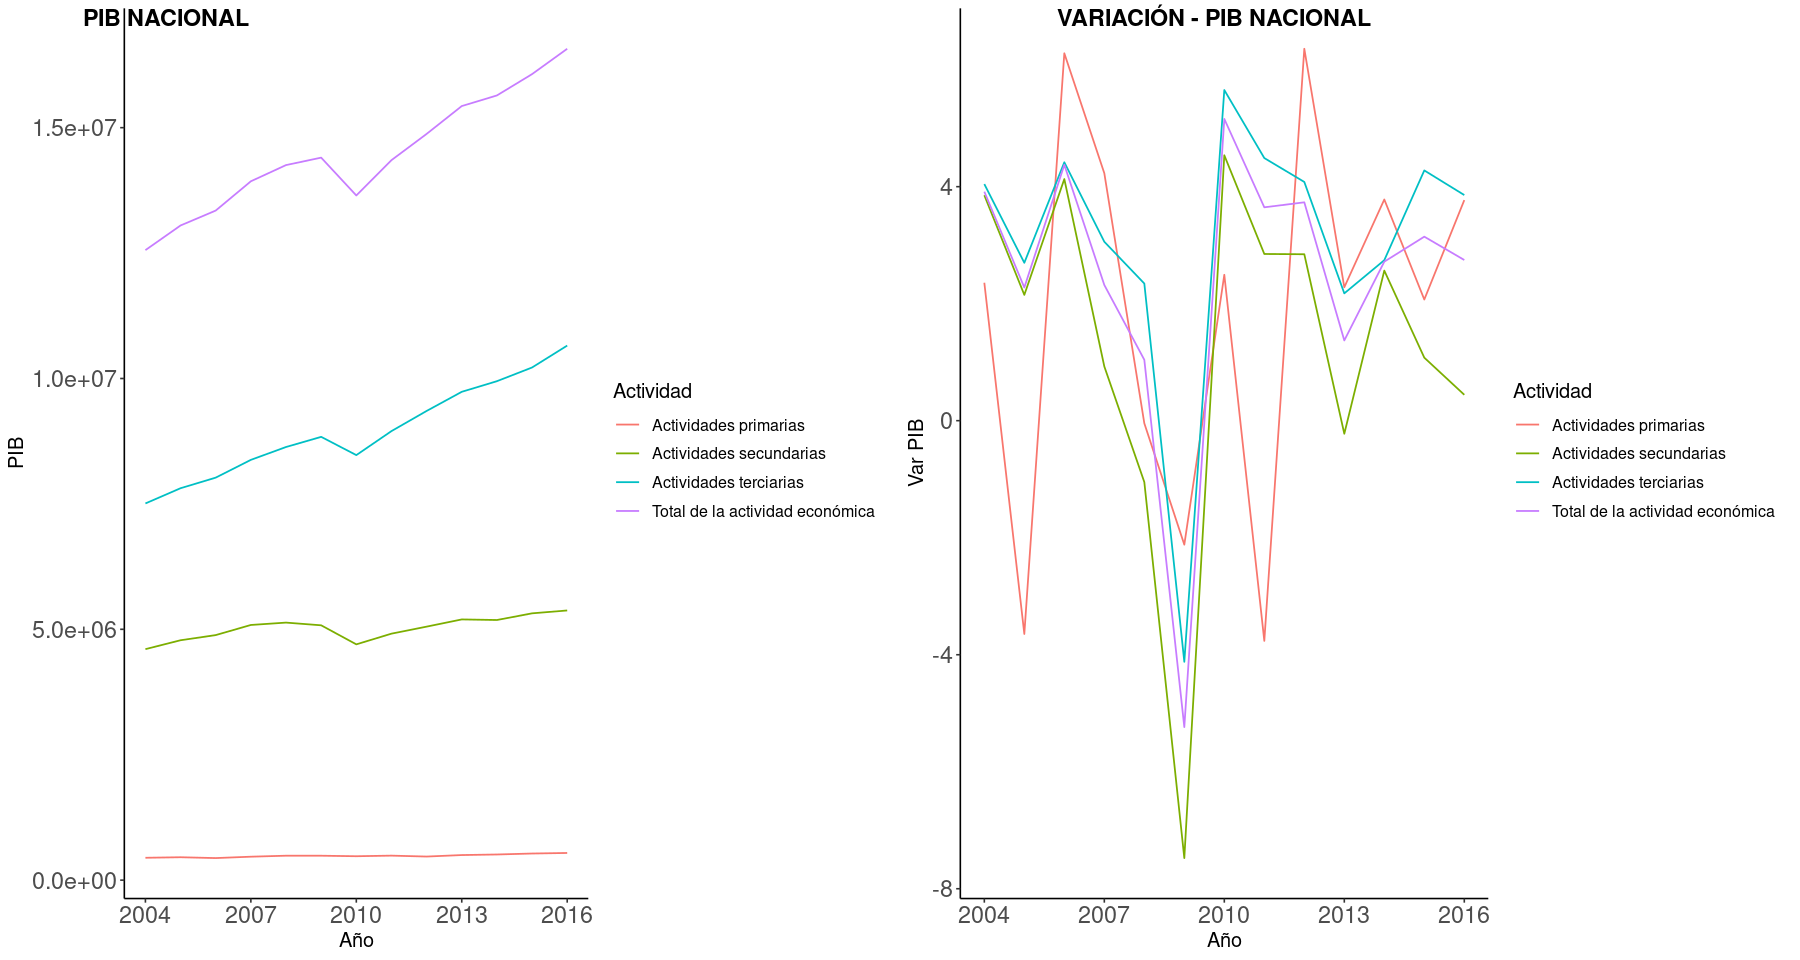

In [5]:
Nac = which(PIB$Entidad == "Total nacional")

#Grafica del PIB Nacional
PIBNac <- ggplot(data=PIB[Nac,], 
                    aes(x=Año,
                        y=PIB,
                        group = Actividad,
                        colour = Actividad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año') +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=14),
                  axis.text.y = element_text(size=14),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black"),
                 text = element_text(size = 12)) #+ ggtitle("PIB Nacional")

#Grafica de la variacion del PIB Nacional
PIBvarNac <- ggplot(data=PIBvar[Nac,], 
                    aes(x=Año,
                        y=PIB,
                        group = Actividad,
                        colour = Actividad)) +
            geom_line() +
            labs(y = 'Var PIB', x = 'Año') +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=14),
                  axis.text.y = element_text(size=14),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black"),
                 text = element_text(size = 12)) #+ ggtitle("PIB Nacional")

#Ajustamos las graficas al tamaño de la hoja
options(repr.plot.width=15, repr.plot.height=8)

#Se grafican los dos elementos
ggarrange(PIBNac, PIBvarNac, 
          labels = c("PIB NACIONAL", "VARIACIÓN - PIB NACIONAL"),
          ncol = 2, nrow = 1)

In [6]:
Nac = which((PIB$Entidad == "Total nacional") & (PIB$Año == 2016))
tabla=cbind(PIB[Nac,], PIBvar[Nac,]$PIB)
colnames(tabla)[dim(tabla)[2]] = "Variación"
tabla

Actividad                       Entidad       
1 Total de la actividad económica Total nacional
2 Actividades primarias           Total nacional
3 Actividades secundarias         Total nacional
4 Actividades terciarias          Total nacional
  Concepto                                        PIB      Año  Variación
1 Total nacional -Total de la actividad económica 16573100 2016 2.745877 
2 Total nacional -Actividades primarias             541200 2016 3.769956 
3 Total nacional -Actividades secundarias          5375575 2016 0.442148 
4 Total nacional -Actividades terciarias          10656325 2016 3.855982

###### De las gráficas anteriores se puede observar:

- Las actividades terciarias son las que más aportan al PIB.

- La variación de las actividades secundarías parece estar acoplada a la de las terciarias.

- La variación de las actividades primarias es la más volátil, pero al mismo tiempo es la que menos peso tiene en el PIB.

- EL peor año fue el 2008, un año después de estallar la crisis financiera del 2008.

##### Análisis del PIB por Estado

Las siguientes imagenes muestran el desarrollo del PIB Estatal del año 2004 al 2016.

In [7]:
#Eliminando los datos del PIB Nacional
Nac = which(PIB$Entidad == "Total nacional")
PIB = PIB[-Nac,]
PIBvar = PIBvar[-Nac,]

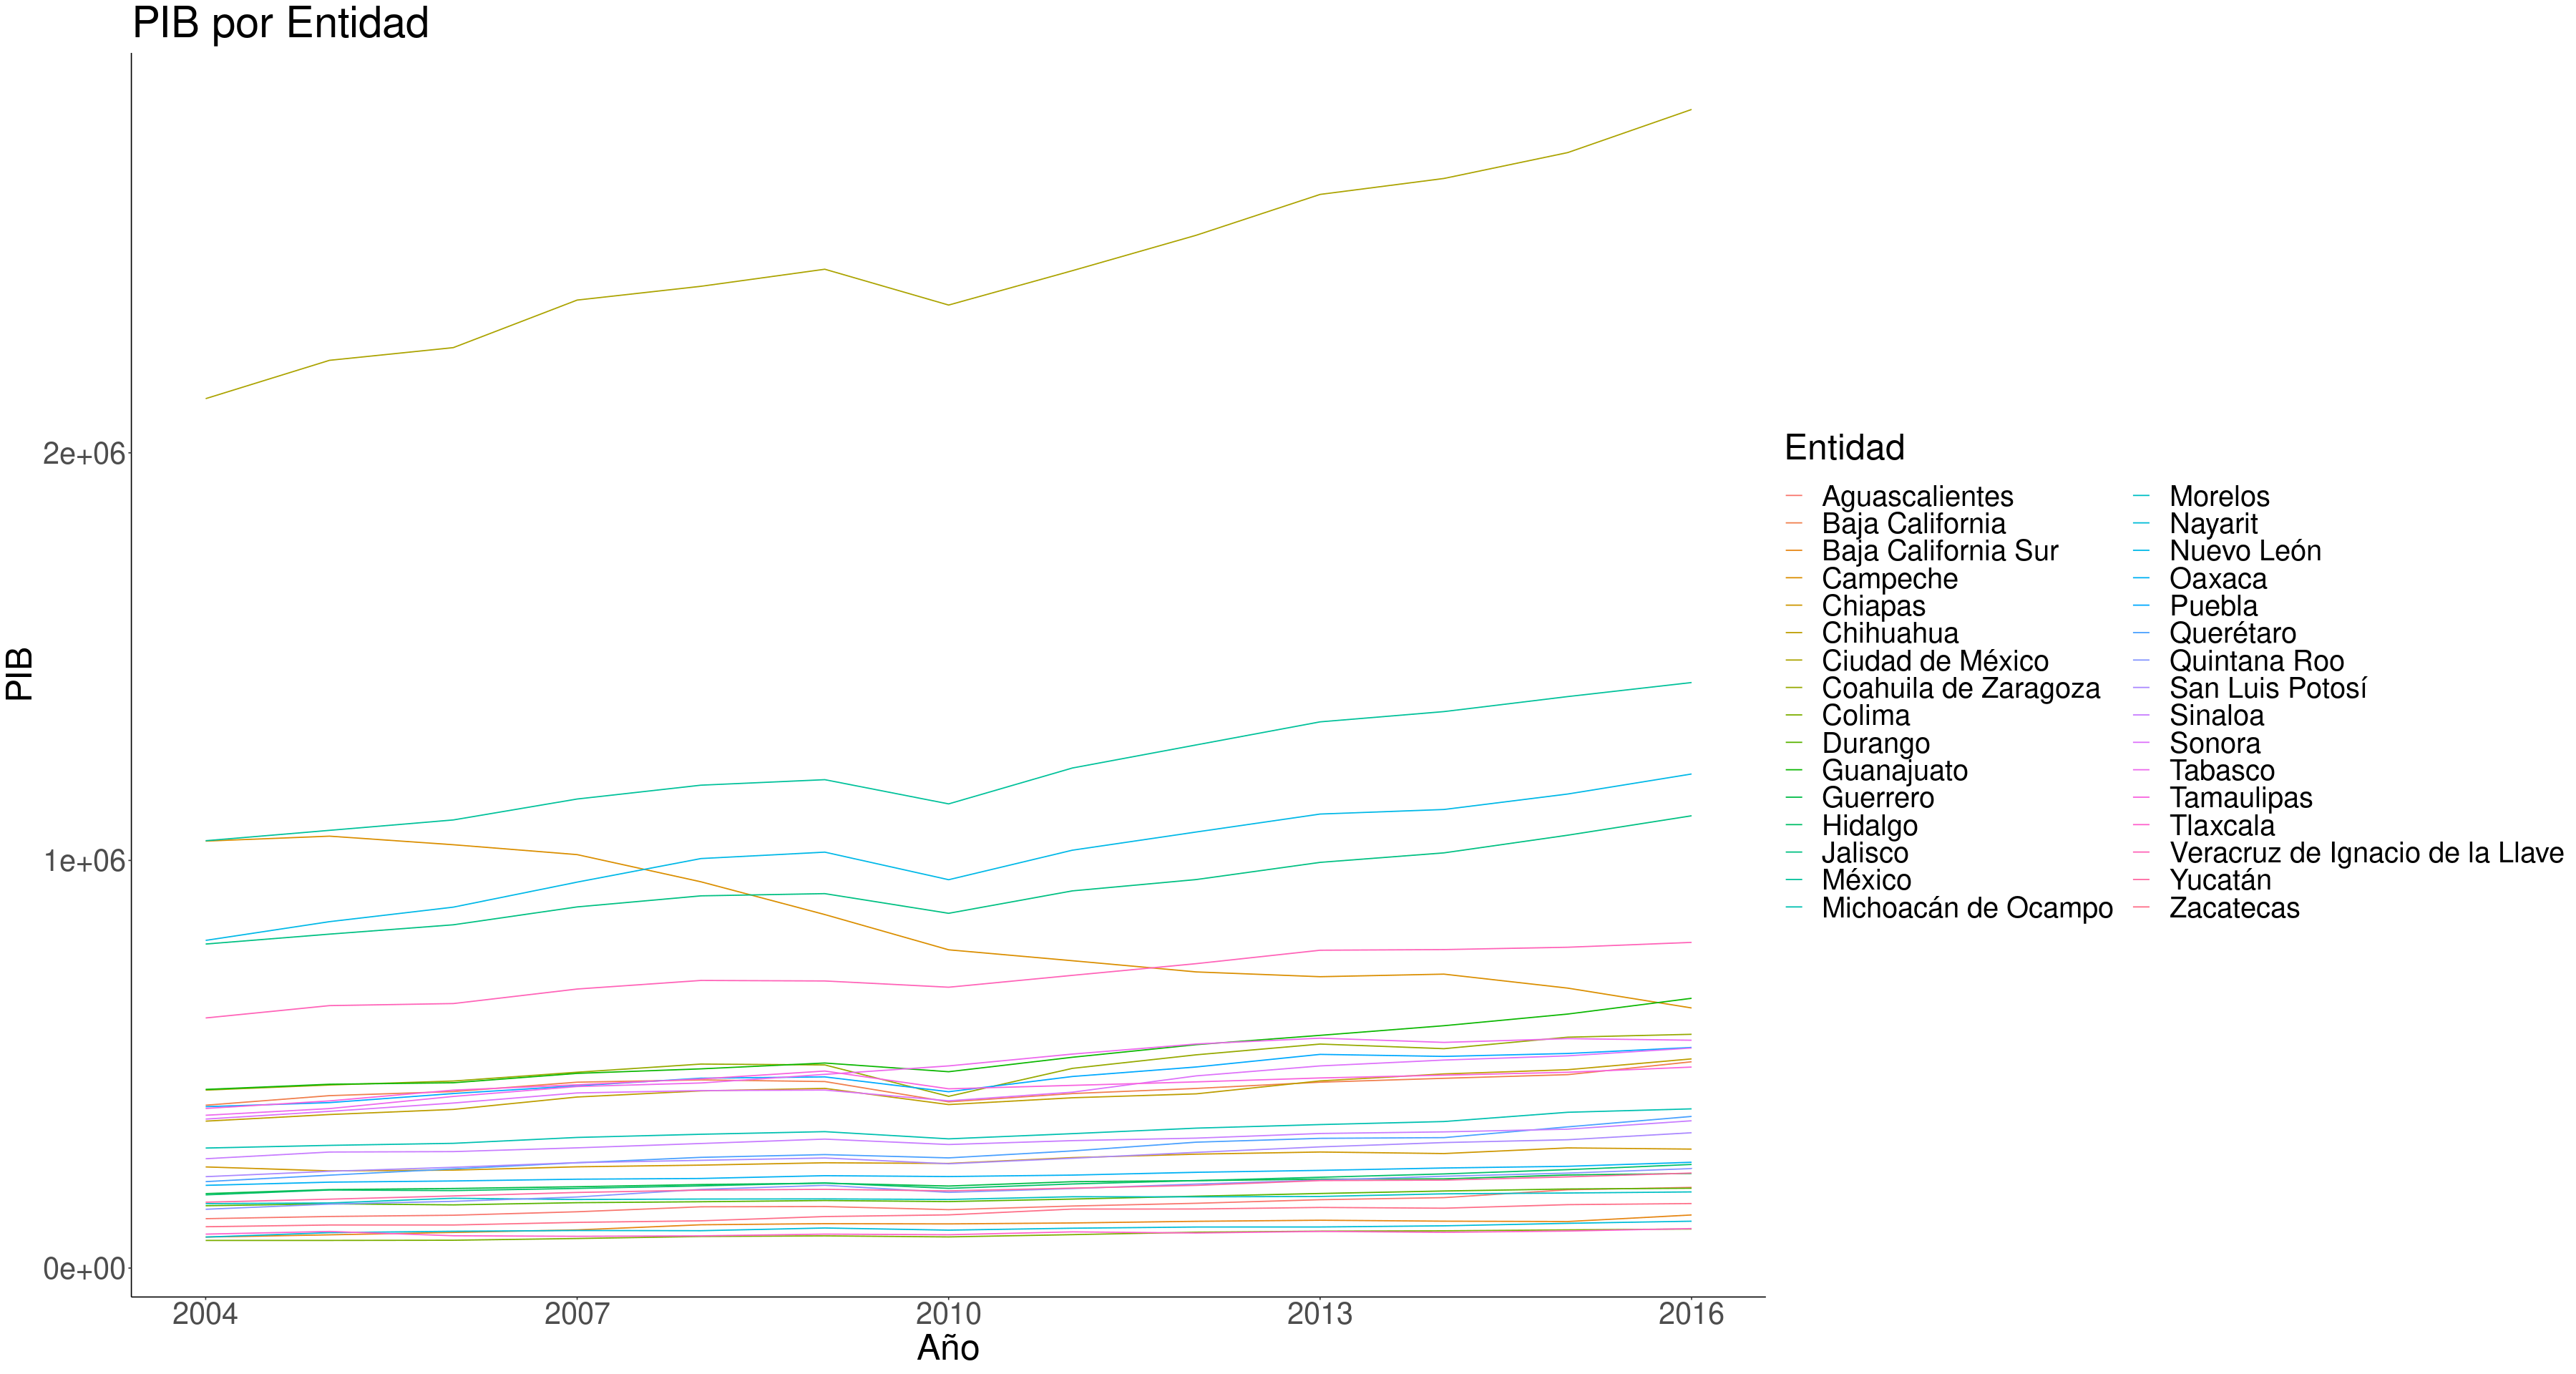

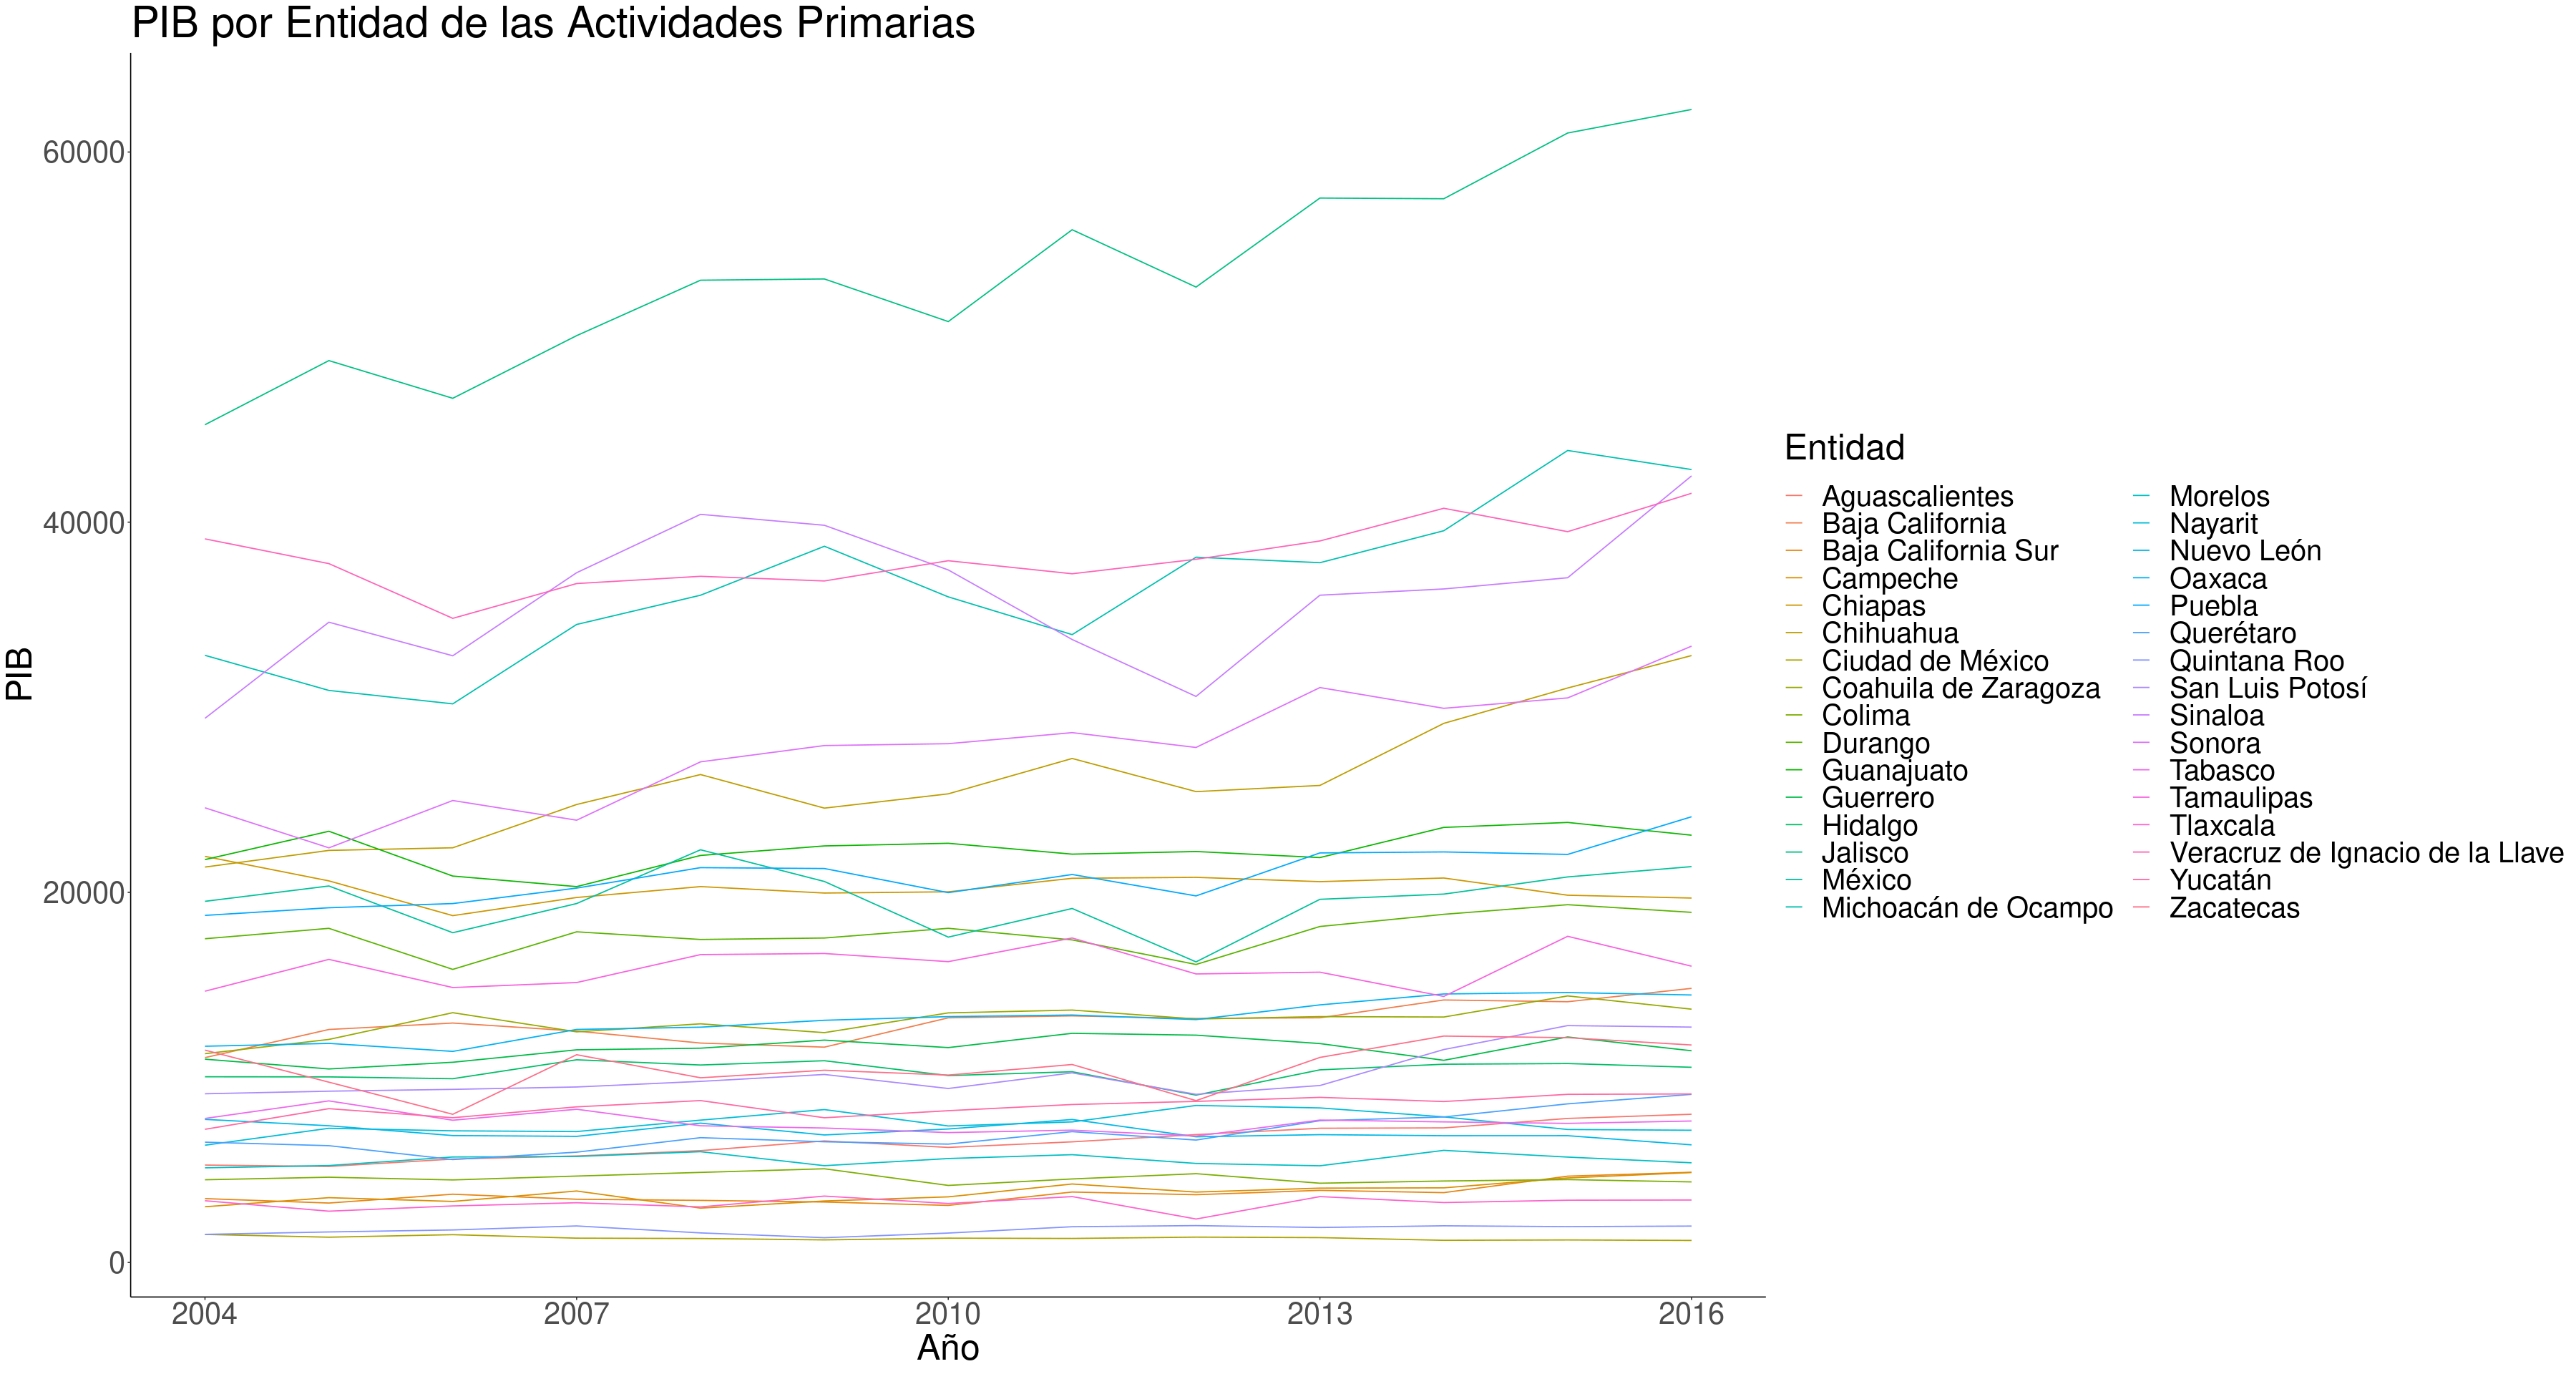

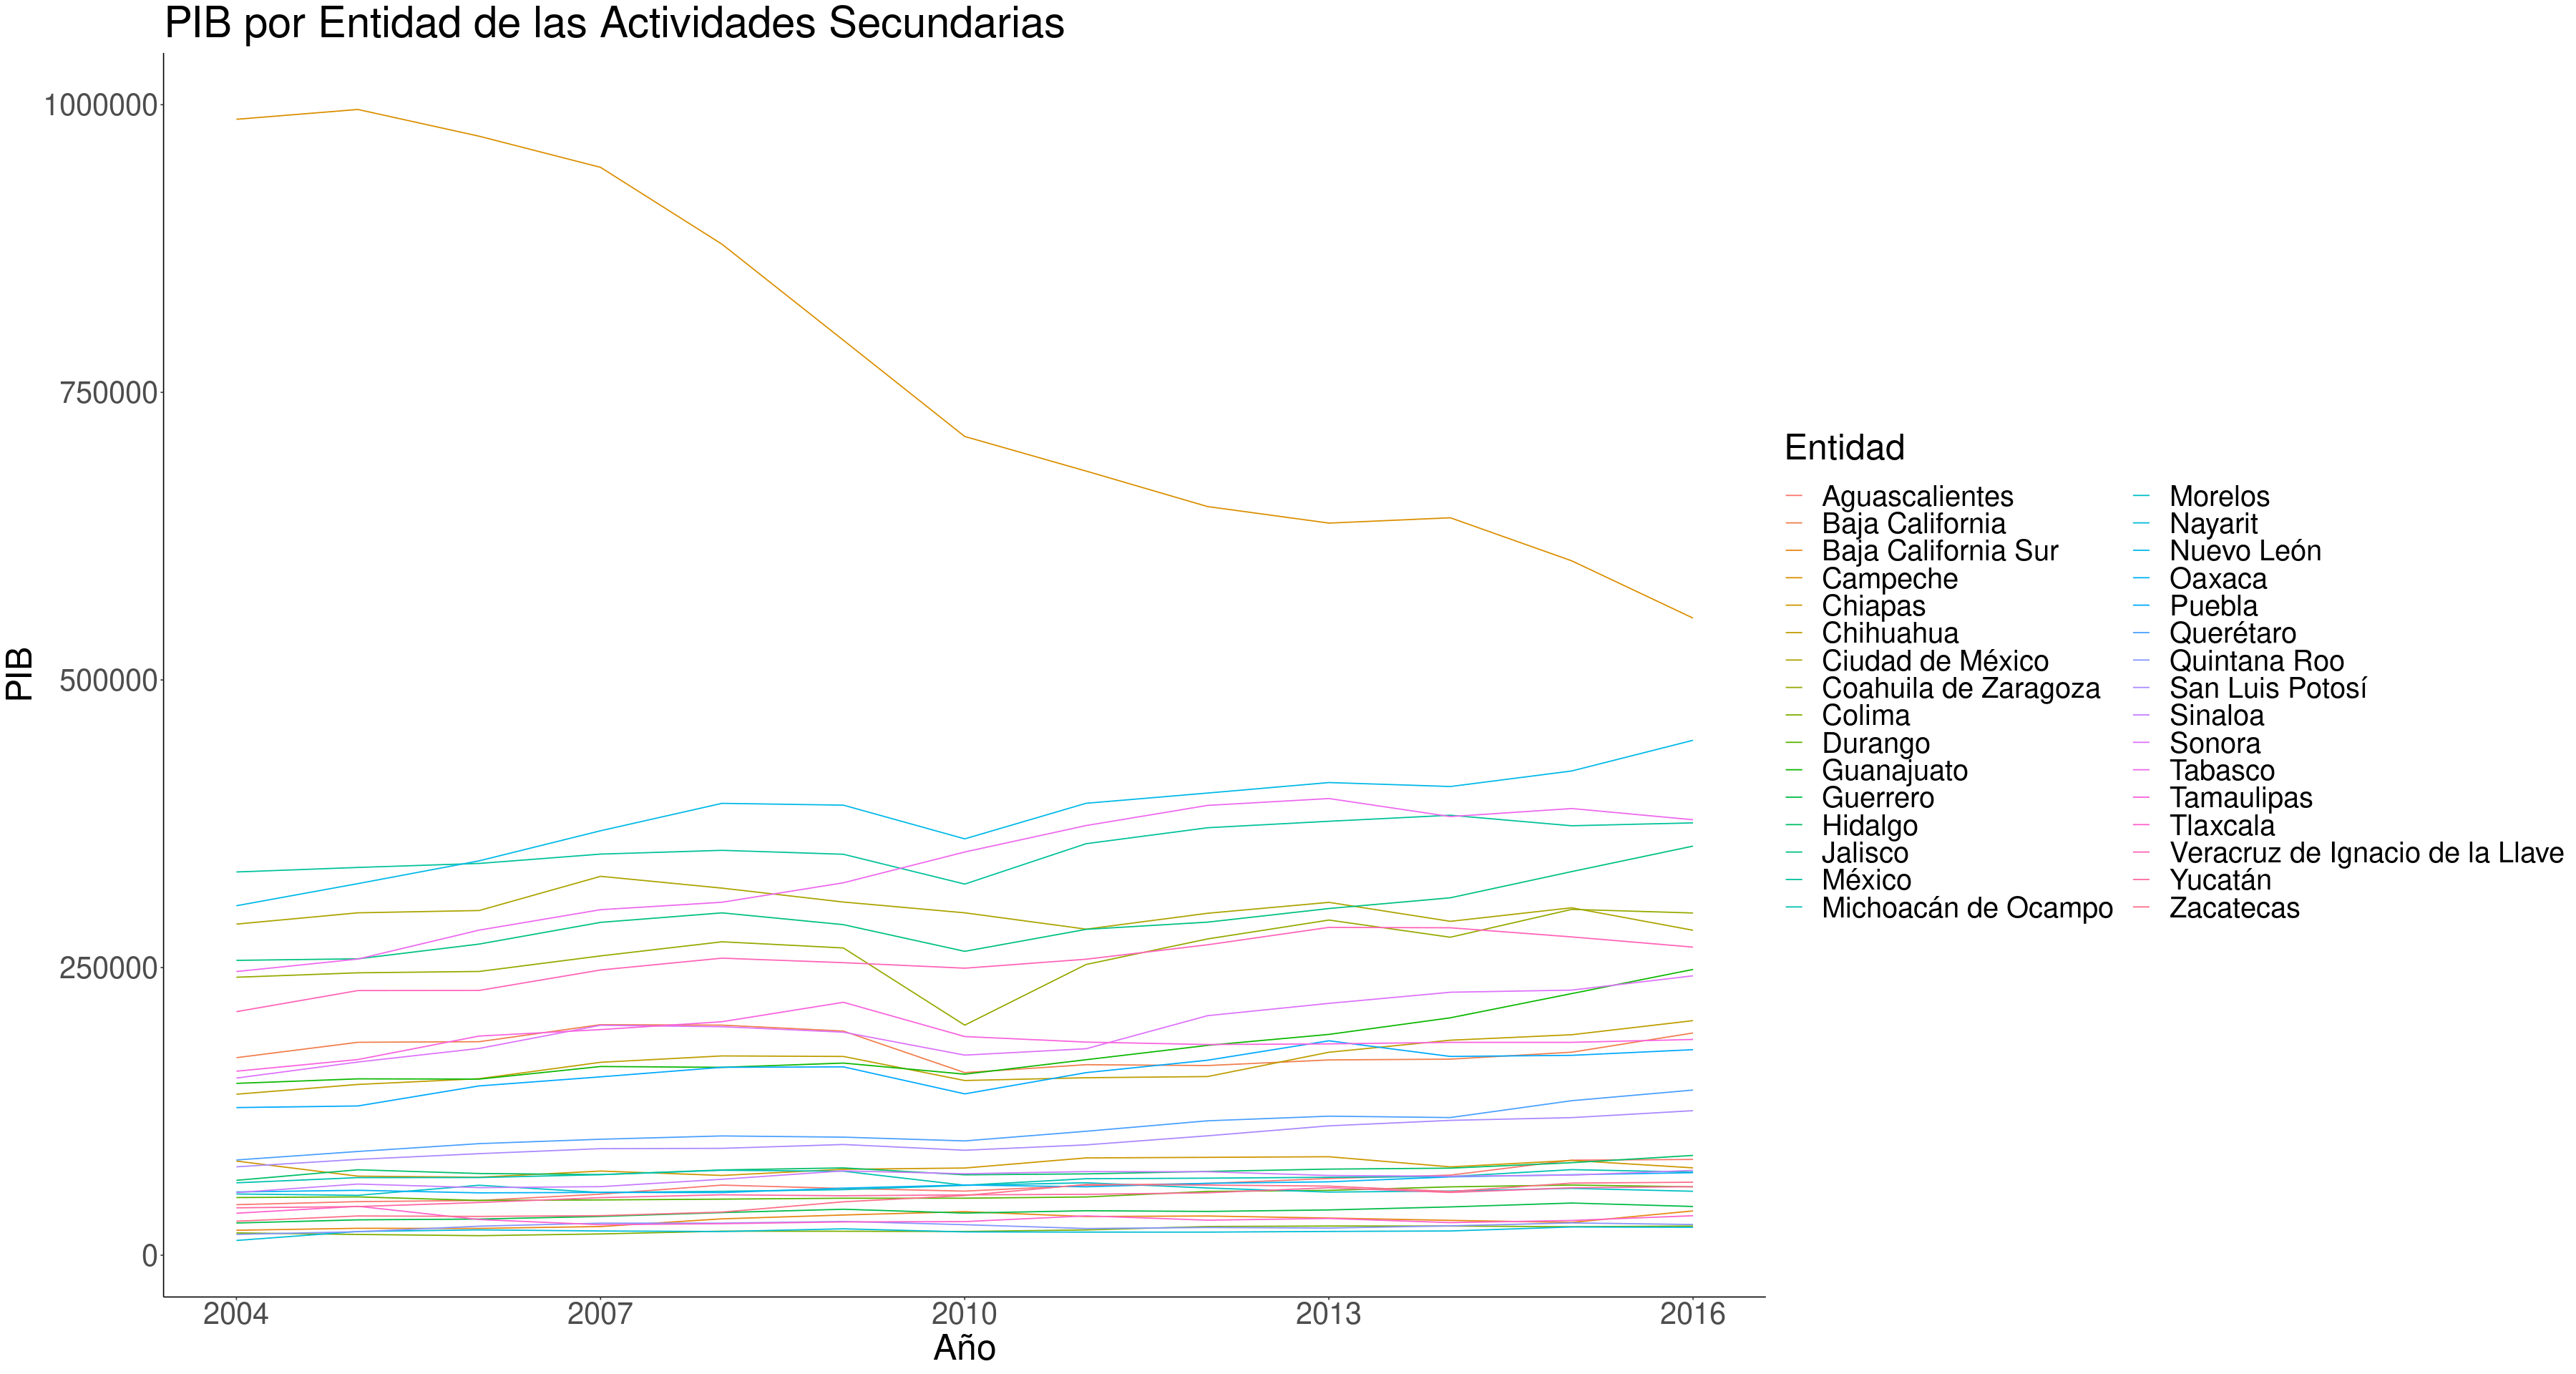

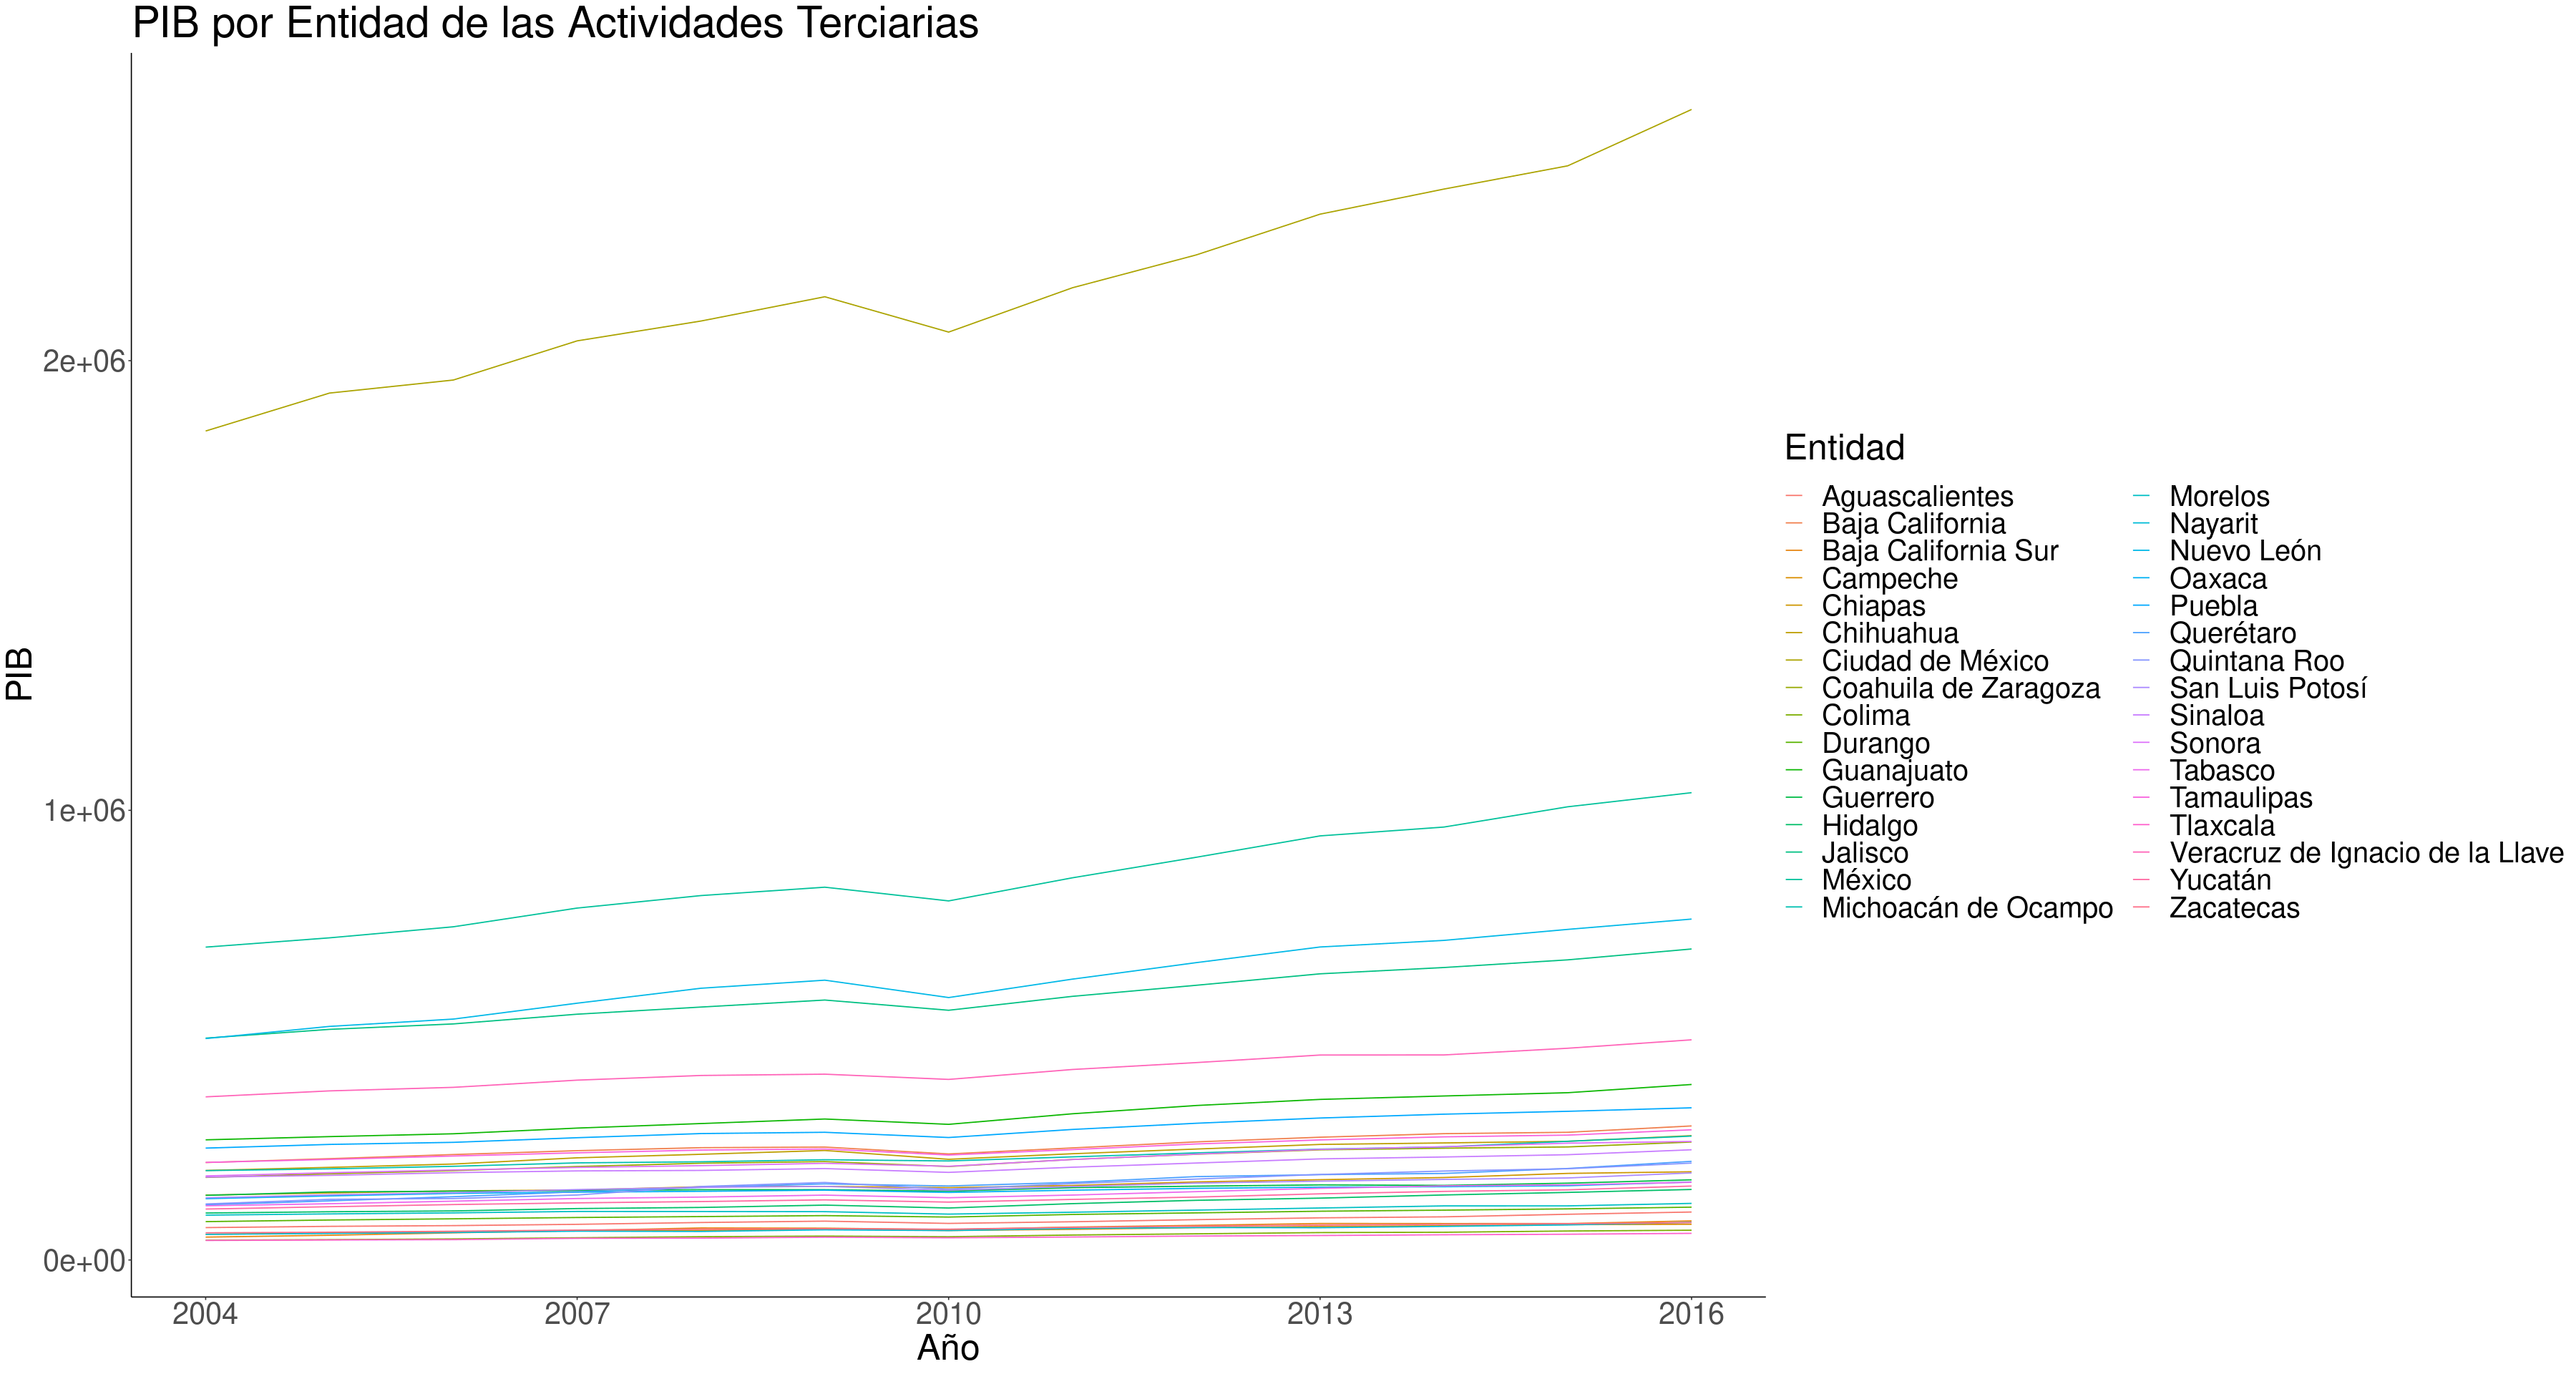

In [8]:
Act = which(PIB$Actividad == "Total de la actividad económica")
    
PIBTot <- ggplot(data=PIB[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=25) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=25),
                  axis.text.y = element_text(size=25),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("PIB por Entidad")


Act = which(PIB$Actividad == "Actividades primarias")
    
PIBPrim <- ggplot(data=PIB[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=25) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=25),
                  axis.text.y = element_text(size=25),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("PIB por Entidad de las Actividades Primarias")


Act = which(PIB$Actividad == "Actividades secundarias")
    
PIBSec <- ggplot(data=PIB[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=25) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=25),
                  axis.text.y = element_text(size=25),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("PIB por Entidad de las Actividades Secundarias")

Act = which(PIB$Actividad == "Actividades terciarias")
    
PIBTer <- ggplot(data=PIB[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=25) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=25),
                  axis.text.y = element_text(size=25),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("PIB por Entidad de las Actividades Terciarias")

#Ajustamos las graficas al tamaño de la hoja
options(repr.plot.width=30, repr.plot.height=16)

#Se grafican los elementos
PIBTot + theme(text = element_text(size = 30))

PIBPrim + theme(text = element_text(size = 30))

PIBSec + theme(text = element_text(size = 30))

PIBTer + theme(text = element_text(size = 30))

In [9]:
Act = which((PIB$Actividad == 'Total de la actividad económica') & (PIB$Año == 2016))
PIB[Act[which.max(PIB[Act,]$PIB)],]

Act = which((PIB$Actividad == 'Actividades primarias') & (PIB$Año == 2016))
PIB[Act[which.max(PIB[Act,]$PIB)],]

Act = which((PIB$Actividad == 'Actividades secundarias') & (PIB$Año == 2016))
PIB[Act[which.max(PIB[Act,]$PIB)],]

Act = which((PIB$Actividad == 'Actividades terciarias') & (PIB$Año == 2016))
PIB[Act[which.max(PIB[Act,]$PIB)],]

Actividad                       Entidad         
1 Total de la actividad económica Ciudad de México
  Concepto                                          PIB     Año 
1 Ciudad de México -Total de la actividad económica 2842349 2016

Actividad             Entidad Concepto                       PIB   Año 
1 Actividades primarias Jalisco Jalisco -Actividades primarias 62301 2016

Actividad               Entidad  Concepto                          PIB   
1 Actividades secundarias Campeche Campeche -Actividades secundarias 553759
  Año 
1 2016

Actividad              Entidad         
1 Actividades terciarias Ciudad de México
  Concepto                                 PIB     Año 
1 Ciudad de México -Actividades terciarias 2558721 2016

De las gráficas anteriores se puede observar que:

- La mayoría de los estados, en la mayoría de las actividades, el PIB es creciente. Exceptuando, por ejemplo, el caso de Campeche en sus actividades secundarias.

- La desigualdad entre estados es creciente en el tiempo.

- Hay estados que contribuyen más que otros al PIB:
    - La Ciudad de México tiene el PIB más alto de todos los estados, tanto a nivel global, como en las actividades terciarías.
    - Jalisco tiene el PIB más alto en las actividades primarias.
    - Campeche tiene el PIB más alto en las actividades secundarias.

Ahora se repetirá el análisis anterior para la variación del PIB.

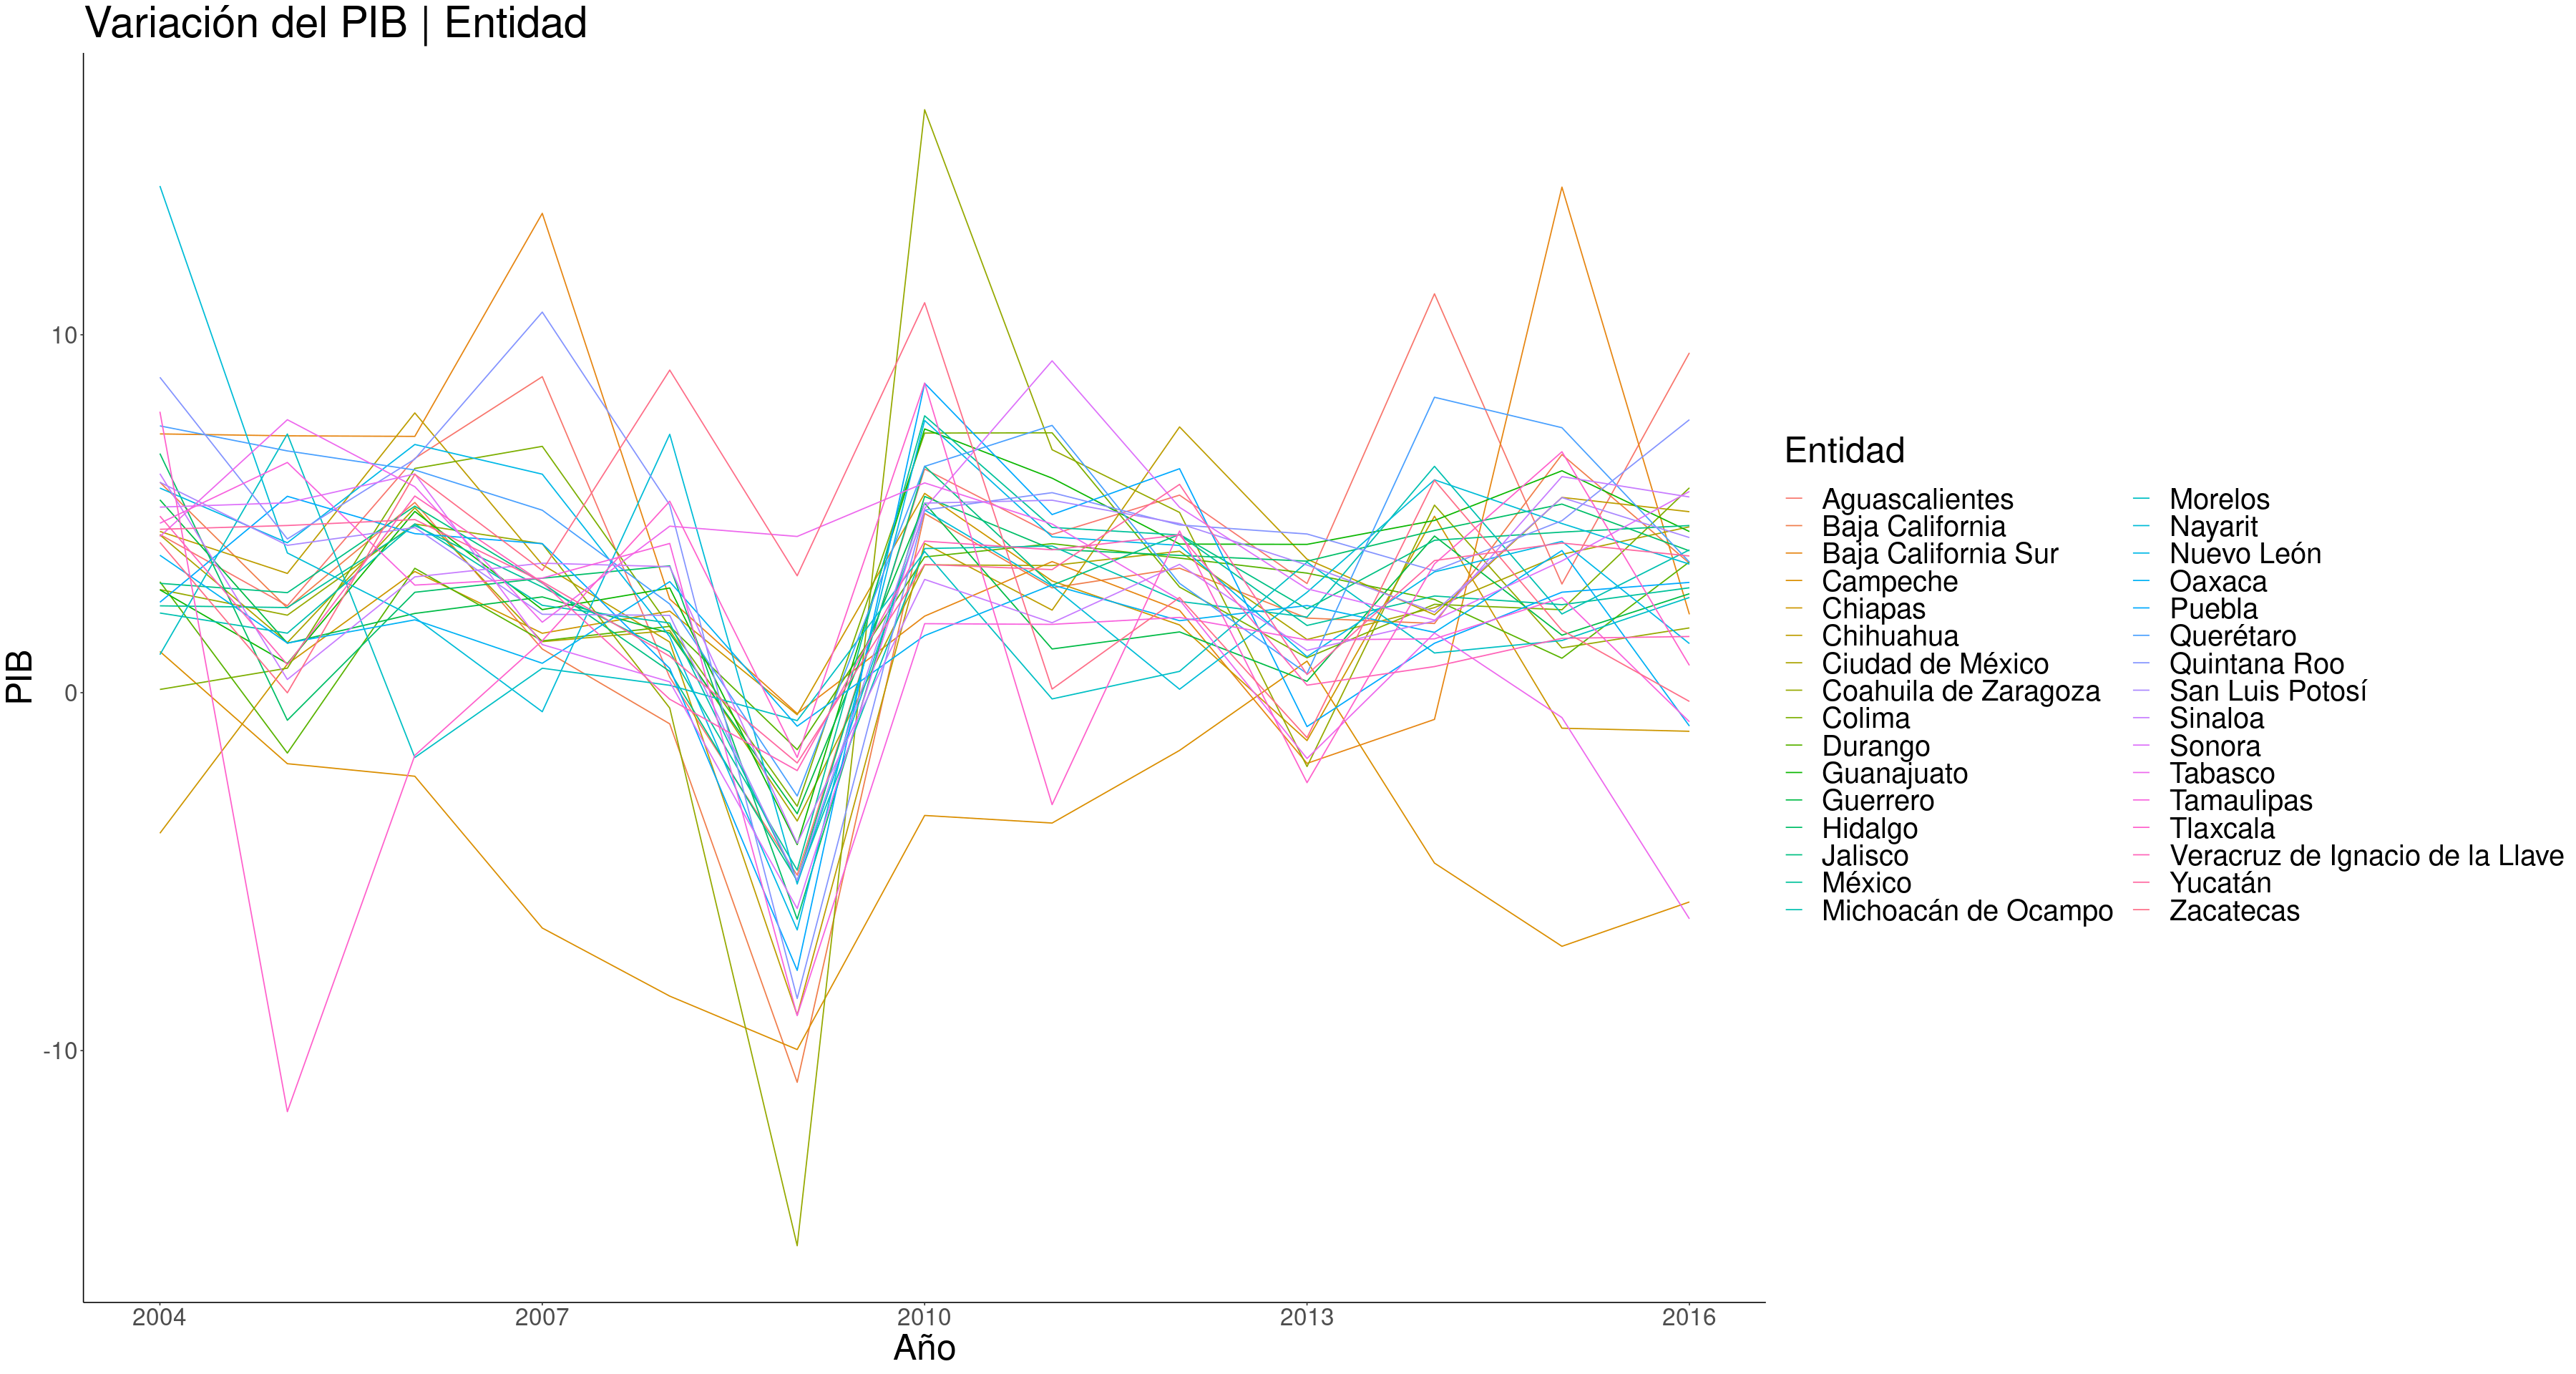

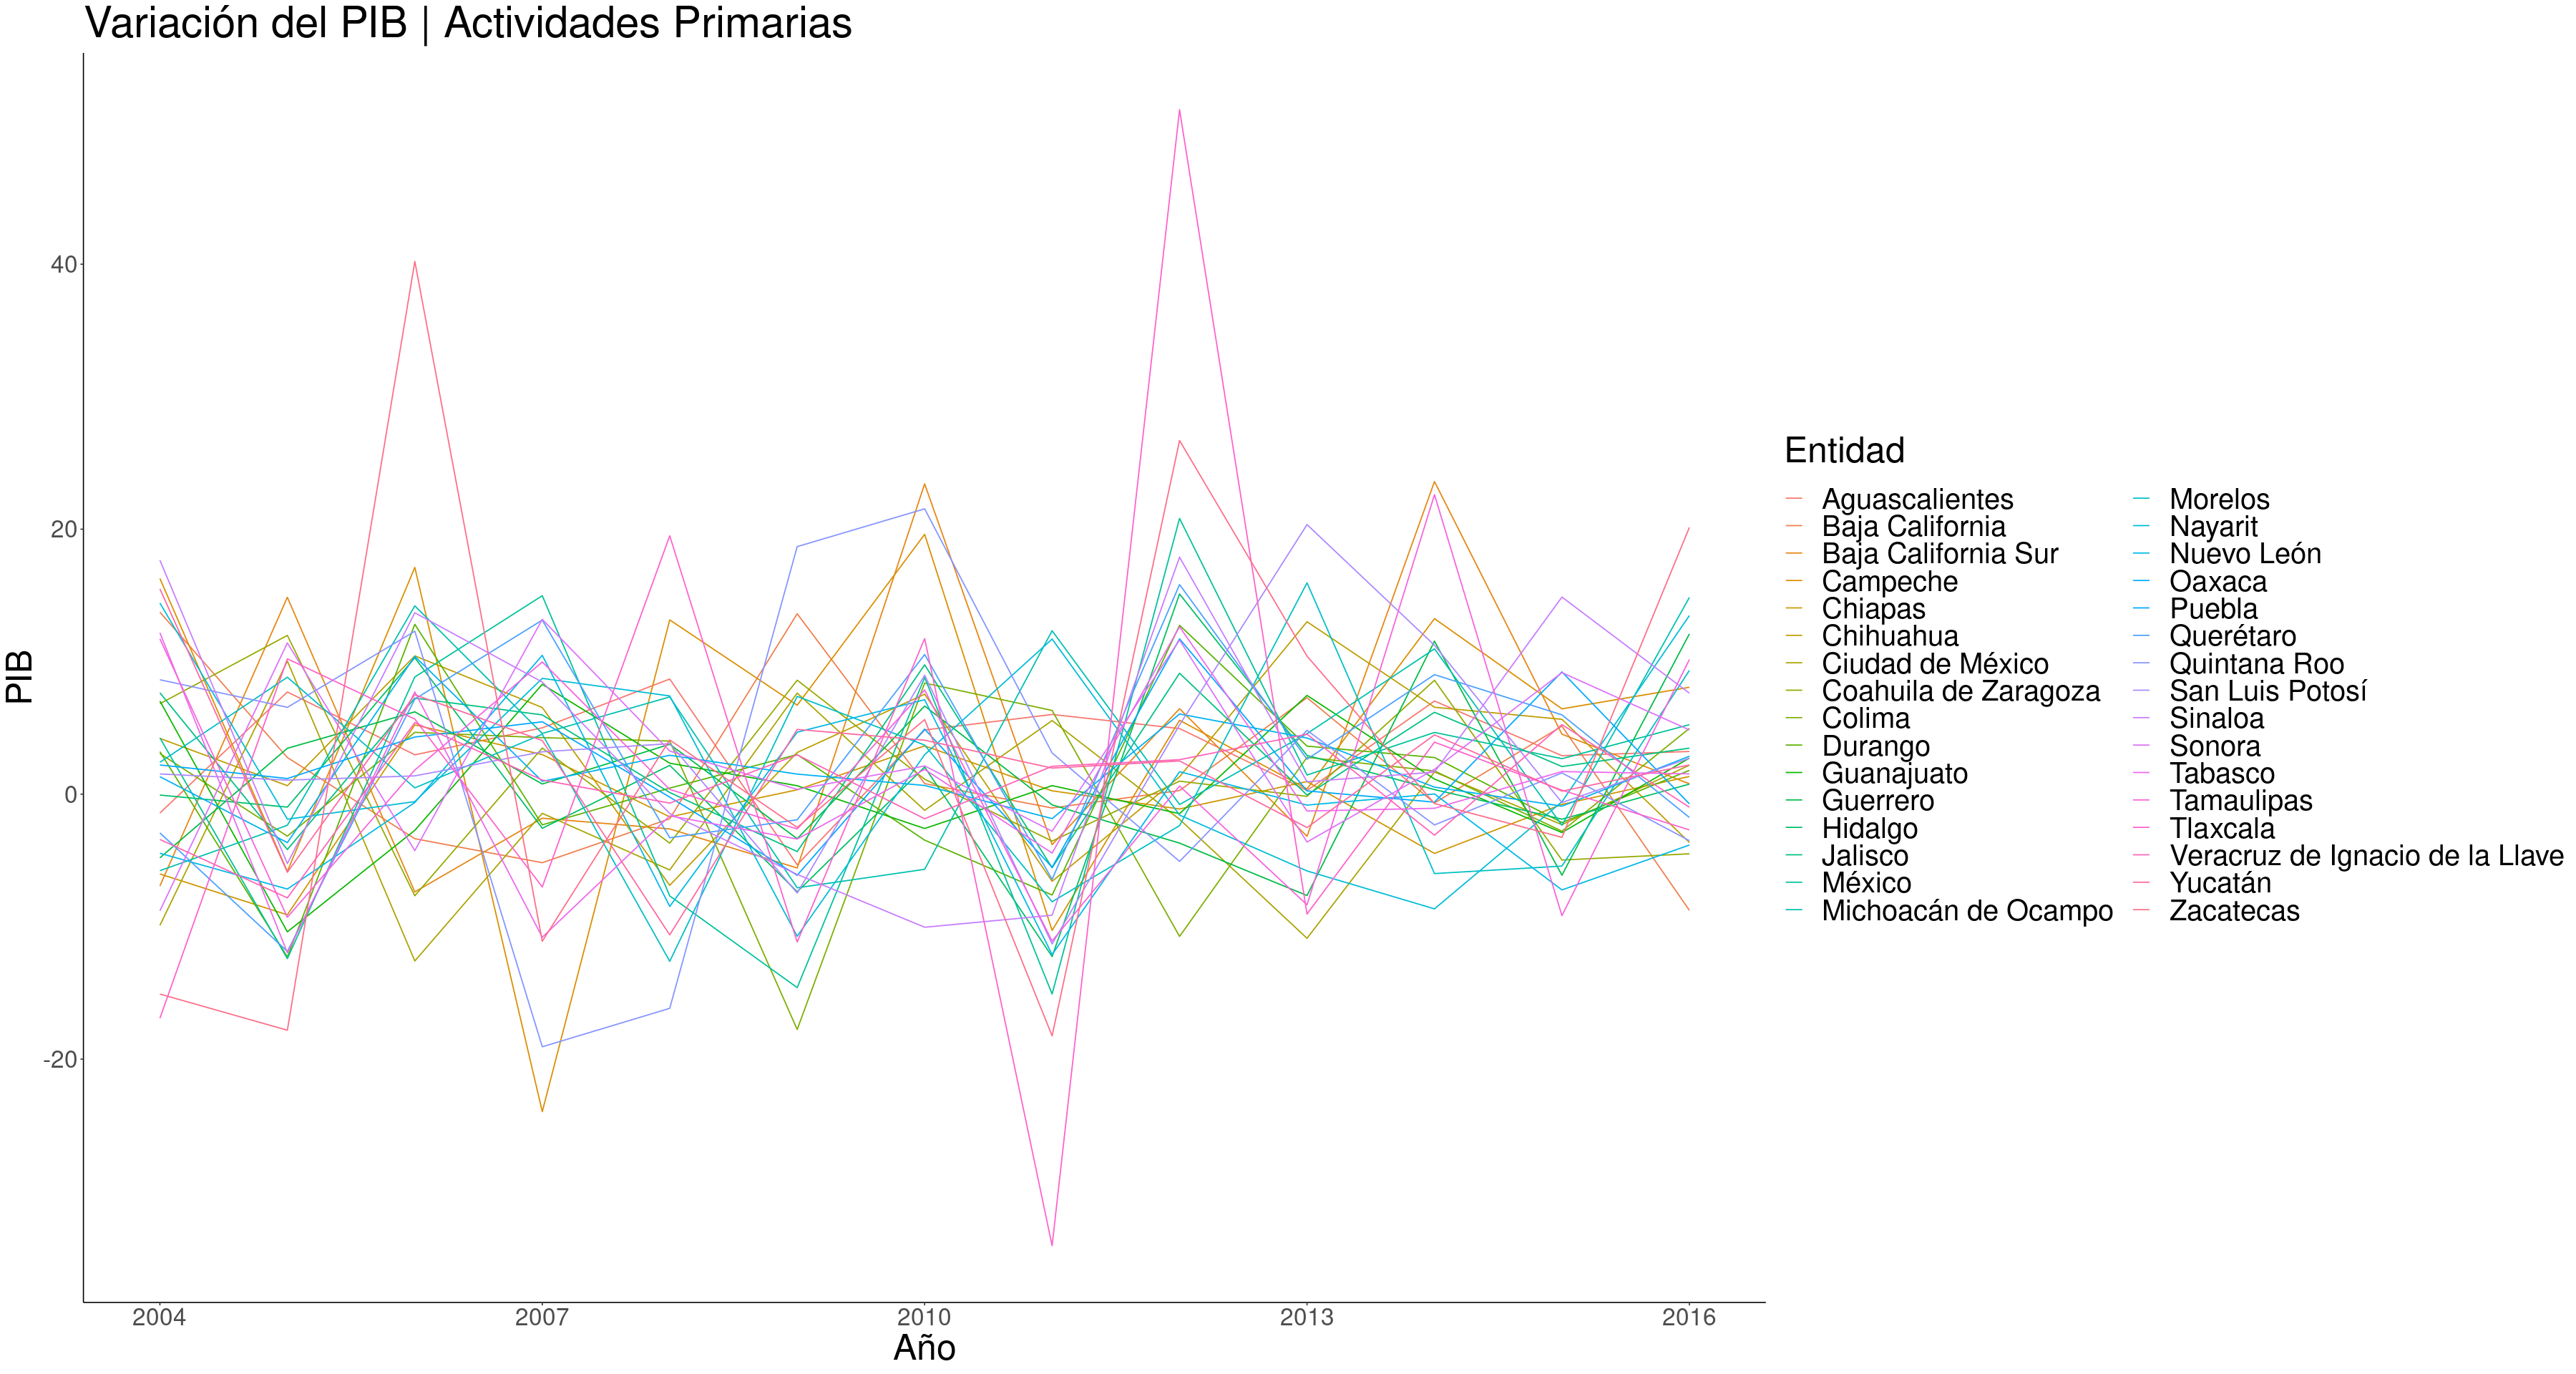

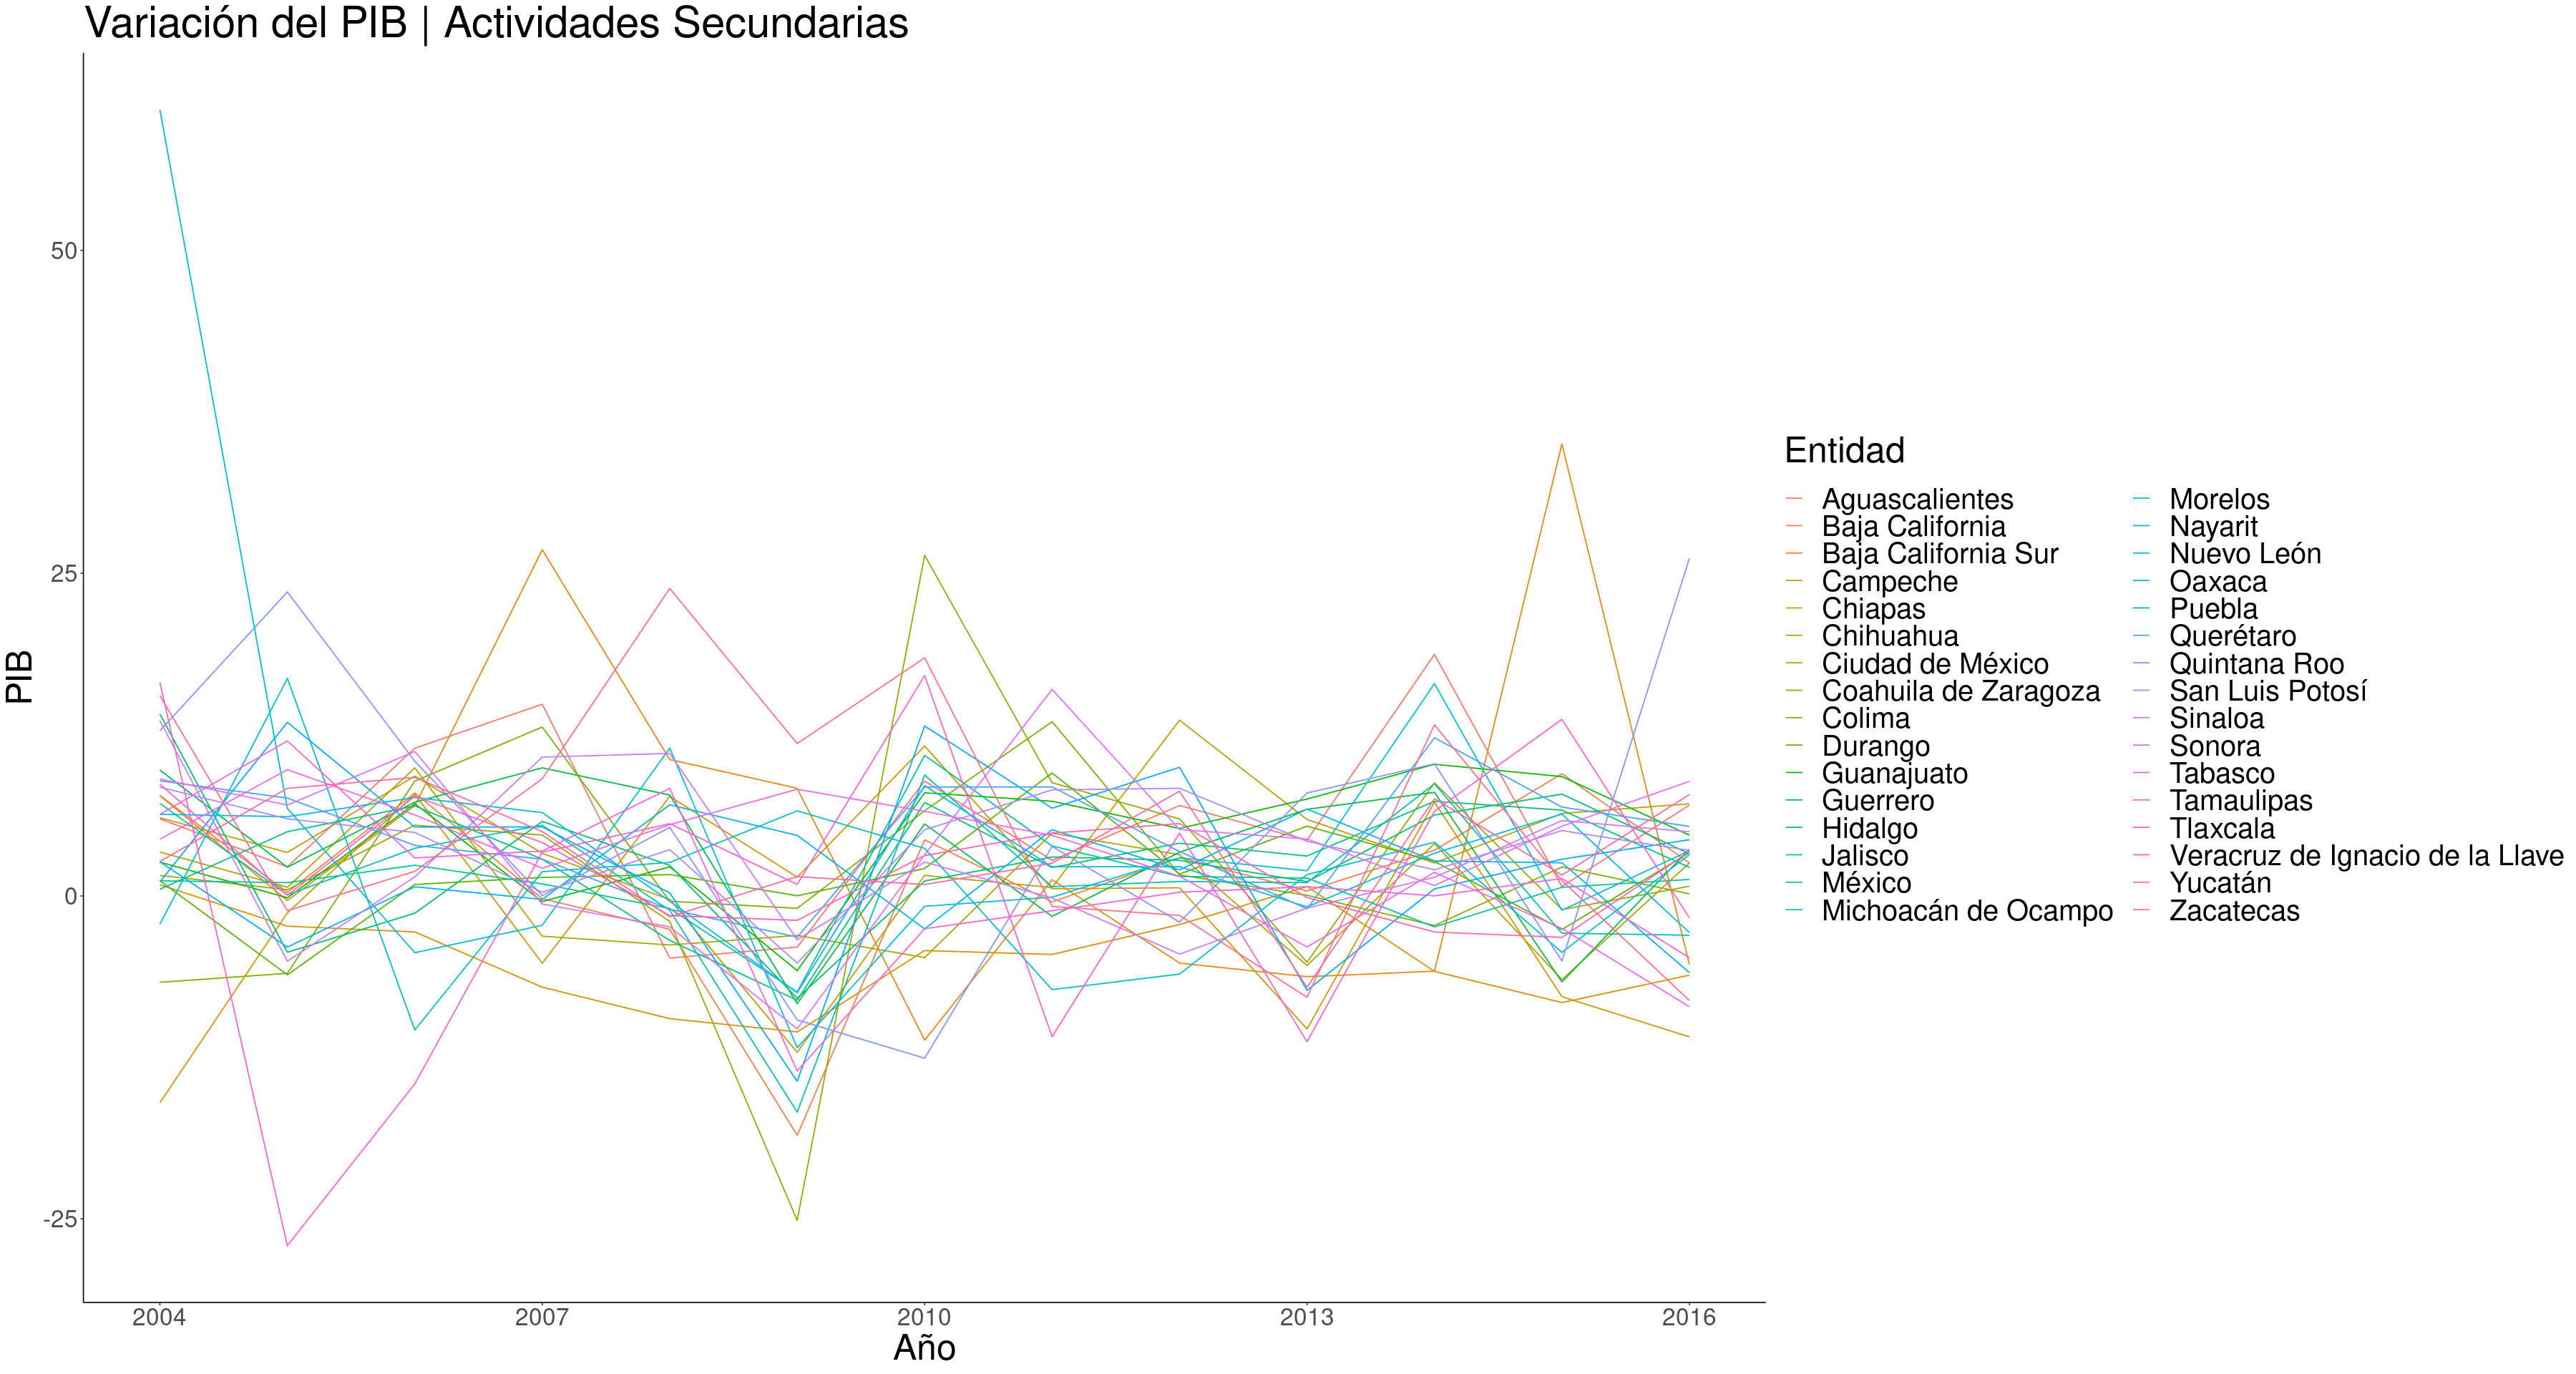

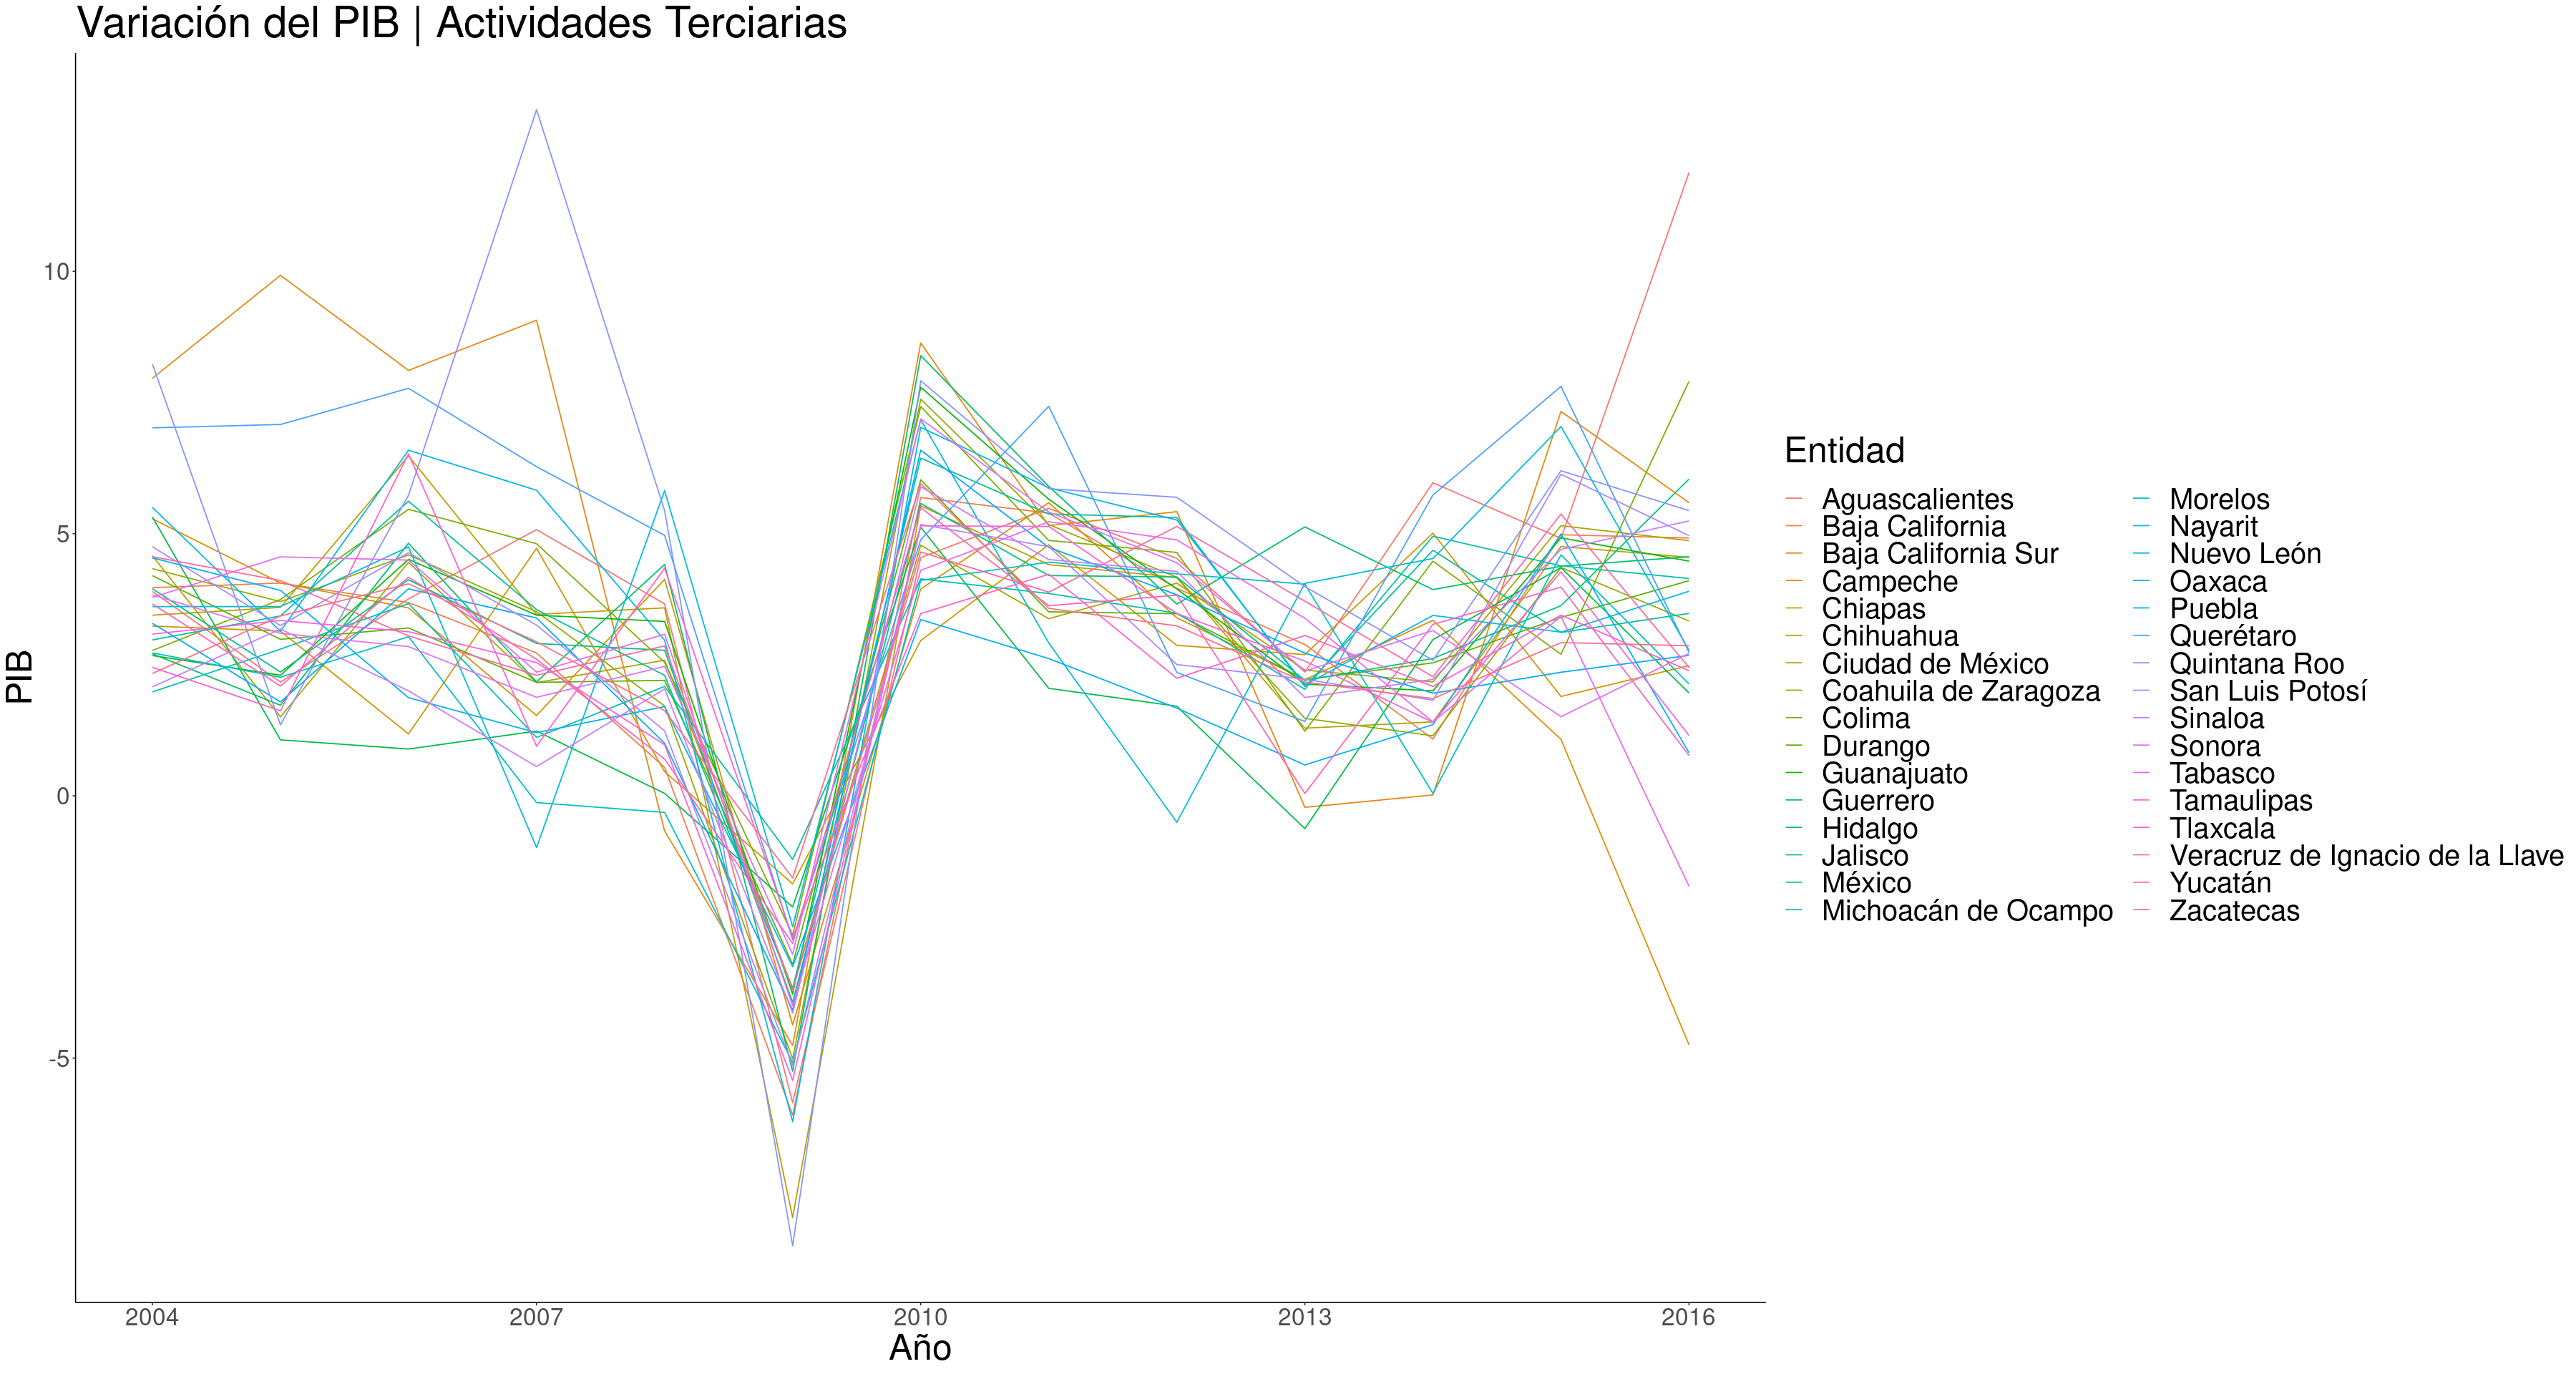

In [10]:
Act = which(PIB$Actividad == "Total de la actividad económica")
    
PIBTot <- ggplot(data=PIBvar[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=20) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=20),
                  axis.text.y = element_text(size=20),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("Variación del PIB | Entidad")


Act = which(PIB$Actividad == "Actividades primarias")
    
PIBPrim <- ggplot(data=PIBvar[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=20) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=20),
                  axis.text.y = element_text(size=20),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("Variación del PIB | Actividades Primarias")


Act = which(PIB$Actividad == "Actividades secundarias")
    
PIBSec <- ggplot(data=PIBvar[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=20) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=20),
                  axis.text.y = element_text(size=20),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("Variación del PIB | Actividades Secundarias")

Act = which(PIB$Actividad == "Actividades terciarias")
    
PIBTer <- ggplot(data=PIBvar[Act,], 
                    aes(x=Año,
                        y=PIB,
                        group = Entidad,
                        colour = Entidad)) +
            geom_line() +
            labs(y = 'PIB', x = 'Año',size=20) +
            theme_bw(base_size = 10) +
            theme(axis.text.x = element_text(size=20),
                  axis.text.y = element_text(size=20),
                  panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  axis.line = element_line(colour = "black")) +
            ggtitle("Variación del PIB | Actividades Terciarias")

#Ajustamos las graficas al tamaño de la hoja
options(repr.plot.width=30, repr.plot.height=16)

#Se grafican los elementos
PIBTot + theme(text = element_text(size = 30))

PIBPrim + theme(text = element_text(size = 30))

PIBSec + theme(text = element_text(size = 30))

PIBTer + theme(text = element_text(size = 30))

Los diagramas anteriores sugieren:

- La variabilidad de las variaciones parece ser constante, exceptuando el periodo 2008-2010.
- Del 2008 al 2009 hubo una caída generalizada de las actividades terciarias, recuperándose hasta el 2010, para tener una ligera tendencia a la baja.

- La variación de las actividades secundarías, también se afectó por la crisis del 2008, pero en menor medida que las actividades terciarias.

- La variación de las actividades primarias no tiene una clara tendencia, ni creciente o decreciente.


## Ejercicio 2.

Se presentan tablas de amortización de dos préstamos, se trata de responder  dos preguntas a partir de la información que se presenta. 

##### Tabla 1:

In [11]:
T1 <- readr::read_csv("Tabla1.csv")
View(T1)

Rows: 13 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Número de Pago, Pago de Capital, Pago de intereses, Total Pago

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Número de Pago Pago de Capital Pago de intereses Total Pago
1  1              $3,141.27       $2,500.00         $5,641.27 
2  2              $3,298.33       $2,342.94         $5,641.27 
3  3              $3,463.25       $2,178.02         $5,641.27 
4  4              $3,636.41       $2,004.86         $5,641.27 
5  5              $3,818.23       $1,823.04         $5,641.27 
6  6              $4,009.15       $1,632.12         $5,641.27 
7  7              $4,209.60       $1,431.67         $5,641.27 
8  8              $4,420.08       $1,221.19         $5,641.27 
9  9              $4,641.09       $1,000.18         $5,641.27 
10 10             $4,873.14       $768.13           $5,641.27 
11 11             $5,116.80       $524.47           $5,641.27 
12 12             $5,372.65       $268.62           $5,641.27 
13 Total          $50,000.00      $17,695.24        $67,695.24

##### Tabla 2:

In [12]:
T2 <- readr::read_csv("Tabla2.csv")
View(T2)

Rows: 13 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Número de Pago, Pago de Capital, Pago de intereses, Total Pago

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Número de Pago Pago de Capital Pago de intereses Total Pago
1  1              $1,256.51       $1,000.00         $2,256.51 
2  2              $1,319.33       $937.18           $2,256.51 
3  3              $1,385.30       $871.21           $2,256.51 
4  4              $1,454.57       $801.94           $2,256.51 
5  5              $1,527.29       $729.22           $2,256.51 
6  6              $1,603.66       $652.85           $2,256.51 
7  7              $1,683.84       $572.67           $2,256.51 
8  8              $1,768.03       $488.48           $2,256.51 
9  9              $1,856.43       $400.08           $2,256.51 
10 10             $1,949.26       $307.25           $2,256.51 
11 11             $2,046.72       $209.79           $2,256.51 
12 12             $2,149.06       $107.45           $2,256.51 
13 Total          $20,000.00      $7,078.12         $27,078.12

### Ejercicio 2.1.
¿Cuántos préstamos adicionales de 20,000 deben otorgarse para sustituir el cápital perdido de un préstamo de 50,000 que un Cliente no pagó.

#### Solución:

Hay que encontrar un entero mayor a el cápital perdido entre los interses del segundo crédito.

In [13]:
ceiling(50000/7078.12)

[1] 8

### Ejercicio 2.2.
¿Cuántos préstamos adicionales de 20,000 deben otorgarse para sustituir el cápital e ingreso perdidos de un préstamo de 50,000 que un Cliente no pagó.

#### Solución:

Hay que encontrar un entero mayor a el cápital más los ingresos perdidos entre los interses del segundo crédito.

In [14]:
ceiling((50000 + 17695.24)/7078.12)

[1] 10

## Ejercicio 3.

Es un ejercicio para determinar costos de adquisición por cuenta a partir del porcentaje de aprobación respecto al total de solicitudes de Crédito, me gustaría que además de colocar el resultado, describas la forma en la que llegaste a ese cálculo.

In [15]:
#Numero de cuentas aprobadas
NumCA = 6500

#Costos fijos mensuales
CostosF = 250000

#Costos variables por solicitud
CostosVsol = 120


#### Ejercicio 3.1.

1) Costo de adquisición por cuenta si el % de aprobación es 35%

In [16]:
aprobacion = 0.35

Solución.

In [17]:
#Numero total de solicitudes
(SolT = (NumCA/aprobacion))

[1] 18571.43

In [18]:
#Costo de las solicitudes
(CSv = SolT*CostosVsol)

[1] 2228571

In [19]:
#Costo total del las solicitudes
#Costos variables + costos fijos
(CT = CSv + CostosF)

[1] 2478571

In [20]:
#Costo de adquisicion
CT/NumCA

[1] 381.3187

#### Ejercicio 3.2.

2) Costo de adquisición por cuenta si el % de aprobación es 25%

In [21]:
aprobacion = 0.25

#Numero total de solicitudes
SolT = NumCA/aprobacion
#Costo de las solicitudes
CSv = SolT*CostosVsol
#Costo total del las solicitudes
#Costos variables + costos fijos
CT = CSv + CostosF

#Costo de adquisicion
CT/NumCA

[1] 518.4615